<a href="https://colab.research.google.com/github/NancyBudgujjar/AIMLMonth2023/blob/main/Heart_disease_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

In [1]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/project/heart_disease_health_indicators_BRFSS2015.csv')
df.shape

(253680, 22)

In [4]:
df['HeartDiseaseorAttack'].value_counts() # 1 = Liver disease and 2 is no disease

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [5]:
categories = {0.0: 0, 1.0: 1}   #Now we map 0.0 = 0(Liver disease), 1.0 = 1(no disease)
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].replace(categories)

#Define the dependent variable that needs to be predicted (labels)
#Y = df["Label"].values

In [6]:
df.head()

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  
0      18.0      15.0       1.0  0.0   9.0        4.0     3.0  
1       0.0       0.0       0.0  0.0   7.0        6.0     1.0  
2      30.0      30.0       1.0  0.0   9.0        4.0     8.0  
3       0.0       0.0       0.0  0.0  11.0        3.0     6.0  
4       3.0       0.0       0.0  0.0  11.0        5.0     4.0  

[5 rows x 22 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
df.describe().T  #Values need to be normalized before fitting.

count       mean       std   min   25%   50%   75%  \
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   
CholCheck             253680.0   0.962670  0.189571   0.0   1.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
Diabetes              253680.0   0.296921  0.698160   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   
Veggies               253680.0   0.811420  0.391175   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     253680.0   0.056197  0.230302   0.0   0.0   0.0   0.0   
AnyHealthcare         253680.0   0.951053  0.215759   0.0   1.0   1.0   1.0   
NoDocbcCost           253680.0   0.084177  0.277654   0.0   0.0   0.0   0.0   
GenHlth               253680.0   2.511392  1.068477   1.0   2.0   2.0   3.0   
MentHlth              253680.0   3.184772  7.412847   0.0   0.0   0.0   2.0   
PhysHlth              253680.0   4.242081  8.717951   0.0   0.0   0.0   3.0   
DiffWalk              253680.0   0.168224  0.374066   0.0   0.0   0.0   0.0   
Sex                   253680.0   0.440342  0.496429   0.0   0.0   0.0   1.0   
Age                   253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0   
Education             253680.0   5.050434  0.985774   1.0   4.0   5.0   6.0   
Income                253680.0   6.053875  2.071148   1.0   5.0   7.0   8.0   

                       max  
HeartDiseaseorAttack   1.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
Diabetes               2.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

In [9]:
print(df.isnull().sum())

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [10]:
df.nunique() # used to get count of unique values in dataset

HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [11]:
df.duplicated().sum()

23899

Since there is no unique patient identifier against each observation, and since it is highly improbable that two subjects have the same exact feature values, its safe to say that these records are possibly duplicates. I will remove these.

In [12]:
df[df.duplicated]

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
1242                     0.0     1.0       1.0        1.0  27.0     1.0   
1563                     0.0     0.0       0.0        1.0  21.0     1.0   
2700                     0.0     0.0       0.0        1.0  32.0     0.0   
3160                     0.0     0.0       0.0        1.0  21.0     0.0   
3332                     0.0     0.0       0.0        1.0  24.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253492                   0.0     1.0       1.0        1.0  33.0     0.0   
253550                   0.0     0.0       0.0        1.0  25.0     0.0   
253563                   0.0     0.0       1.0        1.0  24.0     1.0   
253597                   0.0     0.0       0.0        1.0  24.0     0.0   
253638                   0.0     0.0       0.0        1.0  24.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
1242       0.0       2.0           0.0     0.0  ...            1.0   
1563       0.0       0.0           1.0     1.0  ...            1.0   
2700       0.0       0.0           1.0     1.0  ...            1.0   
3160       0.0       0.0           1.0     1.0  ...            1.0   
3332       0.0       0.0           1.0     1.0  ...            1.0   
...        ...       ...           ...     ...  ...            ...   
253492     0.0       2.0           1.0     1.0  ...            1.0   
253550     0.0       0.0           1.0     1.0  ...            1.0   
253563     0.0       0.0           1.0     1.0  ...            1.0   
253597     0.0       0.0           1.0     1.0  ...            1.0   
253638     0.0       0.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
1242            0.0      5.0       0.0      30.0       1.0  0.0  10.0   
1563            0.0      1.0       0.0       0.0       0.0  0.0   4.0   
2700            0.0      2.0       0.0       0.0       0.0  0.0   5.0   
3160            0.0      1.0       0.0       0.0       0.0  0.0   4.0   
3332            0.0      1.0       0.0       0.0       0.0  1.0   9.0   
...             ...      ...       ...       ...       ...  ...   ...   
253492          0.0      3.0       0.0       0.0       0.0  1.0   9.0   
253550          0.0      1.0       0.0       0.0       0.0  0.0   7.0   
253563          0.0      2.0       0.0       0.0       0.0  1.0   8.0   
253597          0.0      2.0       0.0       0.0       0.0  0.0   5.0   
253638          0.0      2.0       0.0       0.0       0.0  1.0   1.0   

        Education  Income  
1242          4.0     5.0  
1563          6.0     8.0  
2700          6.0     8.0  
3160          6.0     8.0  
3332          6.0     8.0  
...           ...     ...  
253492        6.0     6.0  
253550        6.0     8.0  
253563        6.0     8.0  
253597        6.0     8.0  
253638        4.0     6.0  

[23899 rows x 22 columns]

In [13]:
df = df.drop_duplicates().reset_index().drop('index', axis = 1)

In [14]:
df.shape

(229781, 22)

In [15]:
df = df.rename(columns={'HeartDiseaseorAttack':'Label'}) #Rename Dataset to Label to make it easy to understand
print(df.dtypes)

Label                float64
HighBP               float64
HighChol             float64
CholCheck            float64
BMI                  float64
Smoker               float64
Stroke               float64
Diabetes             float64
PhysActivity         float64
Fruits               float64
Veggies              float64
HvyAlcoholConsump    float64
AnyHealthcare        float64
NoDocbcCost          float64
GenHlth              float64
MentHlth             float64
PhysHlth             float64
DiffWalk             float64
Sex                  float64
Age                  float64
Education            float64
Income               float64
dtype: object


<Axes: xlabel='Label', ylabel='count'>

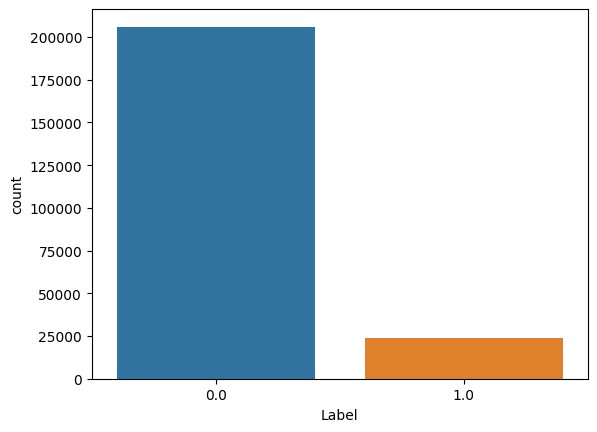

In [16]:
sns.countplot(x="Label", data=df)

<Axes: xlabel='Label', ylabel='count'>

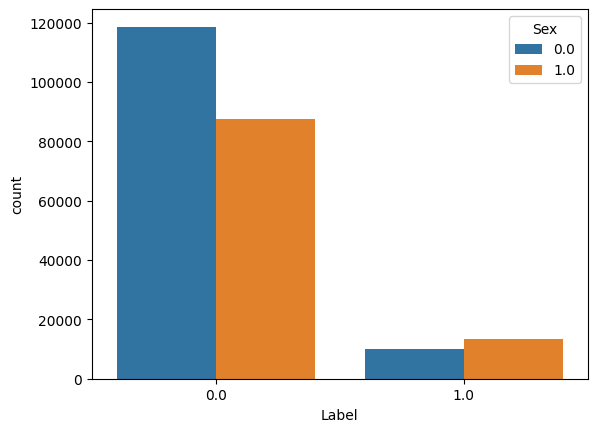

In [17]:
sns.countplot(x="Label", hue="Sex", data=df)

<Axes: xlabel='Age', ylabel='count'>

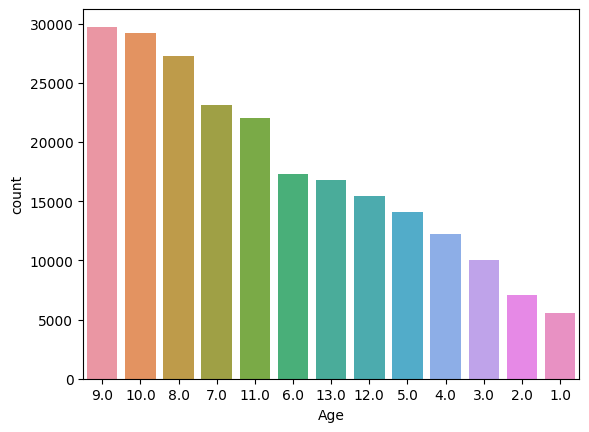

In [18]:
sns.countplot(x = 'Age', data = df, order = df['Age'].value_counts().index)

<Axes: xlabel='Label', ylabel='BMI'>

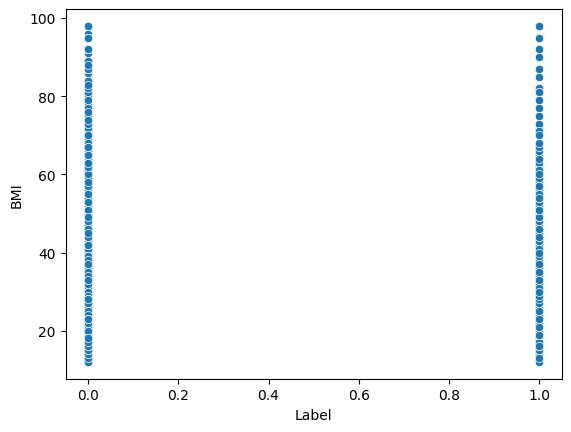

In [19]:
sns.scatterplot(x="Label", y="BMI", data=df)

<Axes: xlabel='Label', ylabel='MentHlth'>

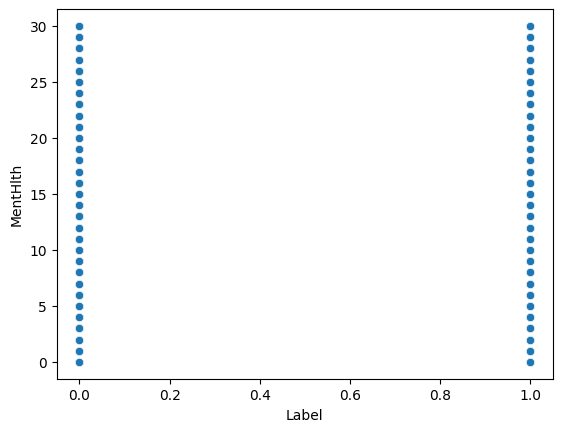

In [20]:
sns.scatterplot(x="Label", y="MentHlth", data=df)

<Axes: xlabel='Label', ylabel='PhysHlth'>

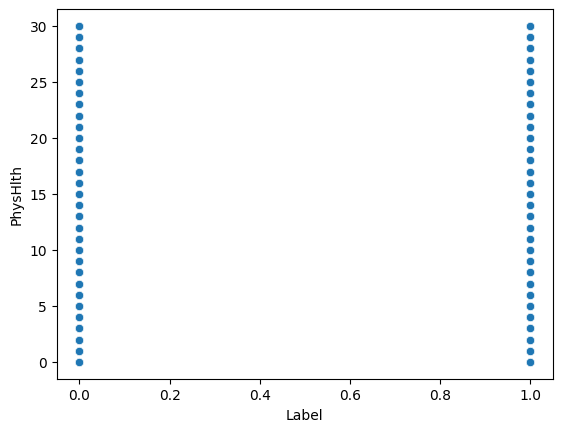

In [21]:
sns.scatterplot(x="Label", y="PhysHlth", data=df)

<Axes: >

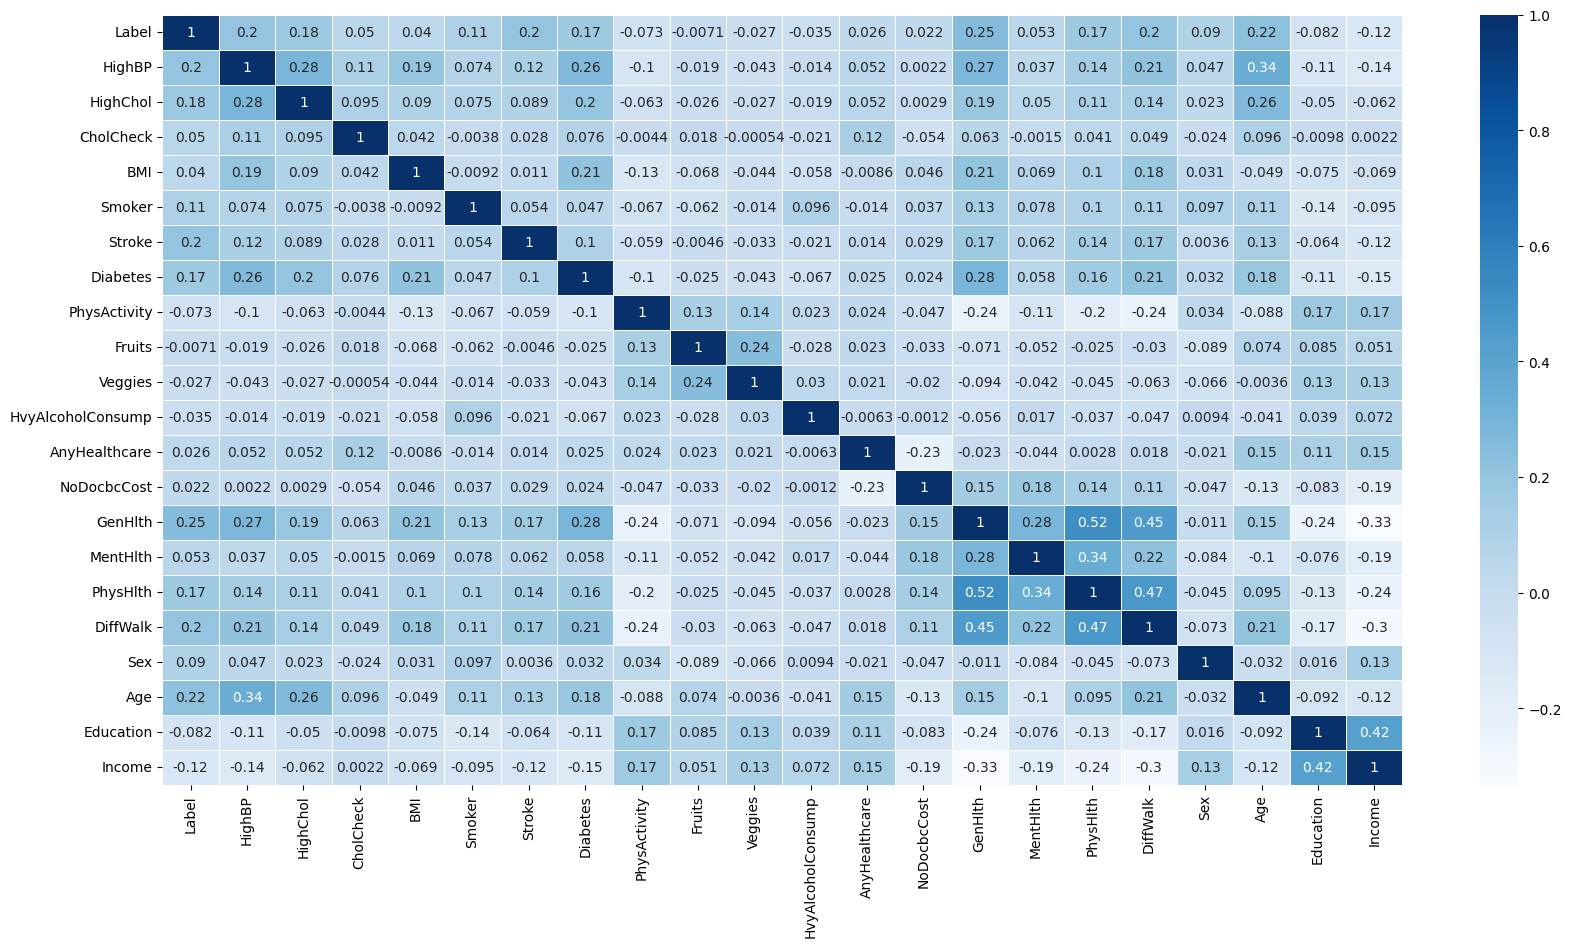

In [22]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap="Blues",linewidths=.5, annot=True)

In [23]:
df['Sex'].value_counts()

0.0    128854
1.0    100927
Name: Sex, dtype: int64

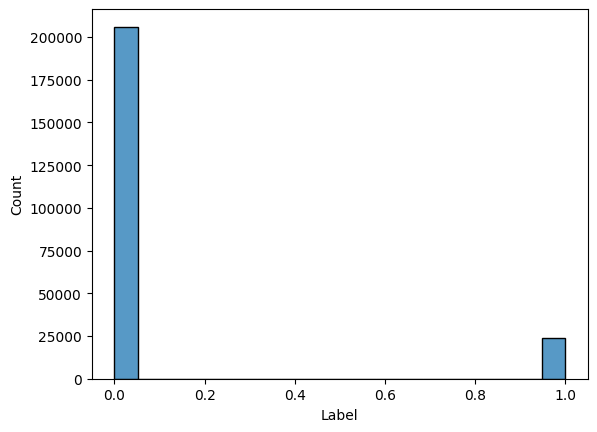

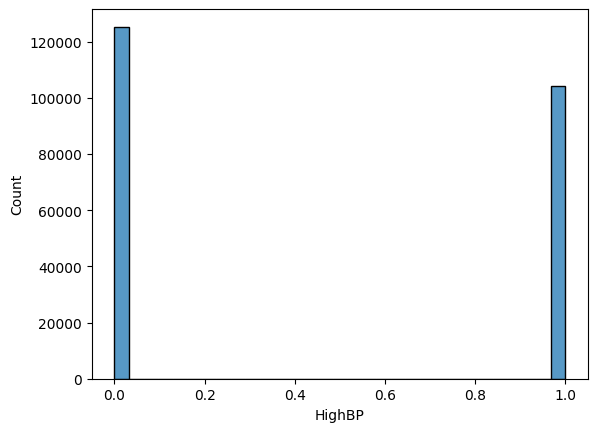

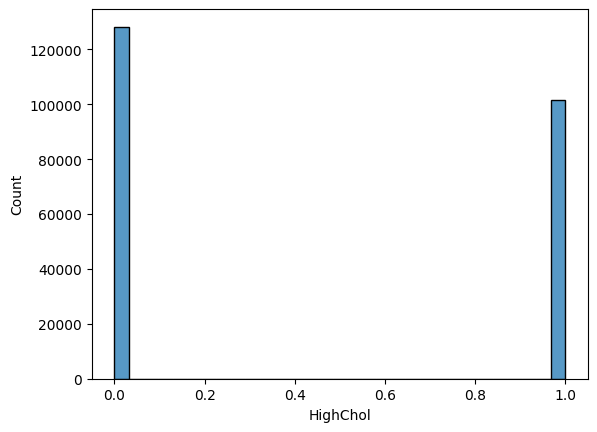

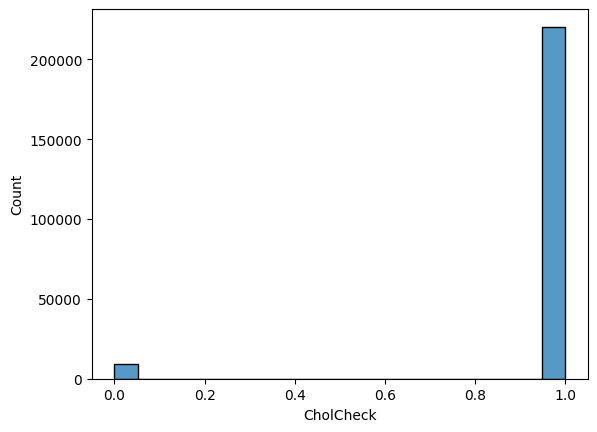

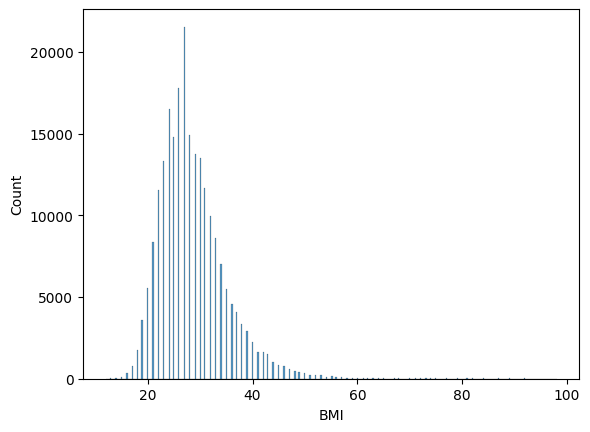

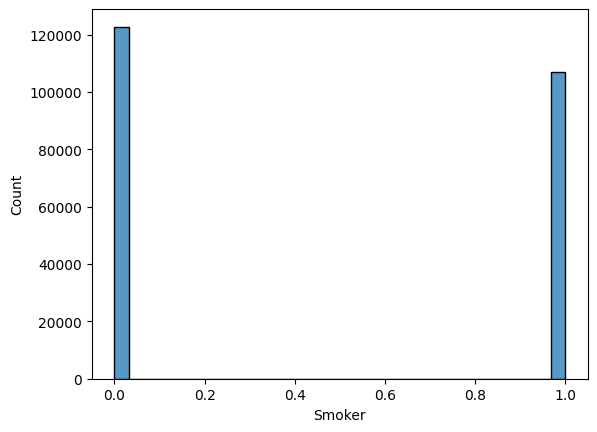

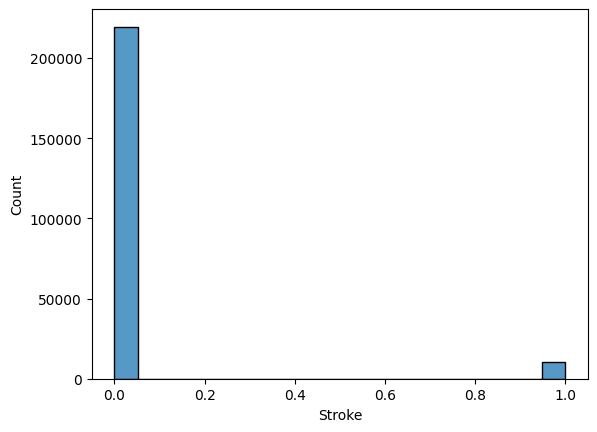

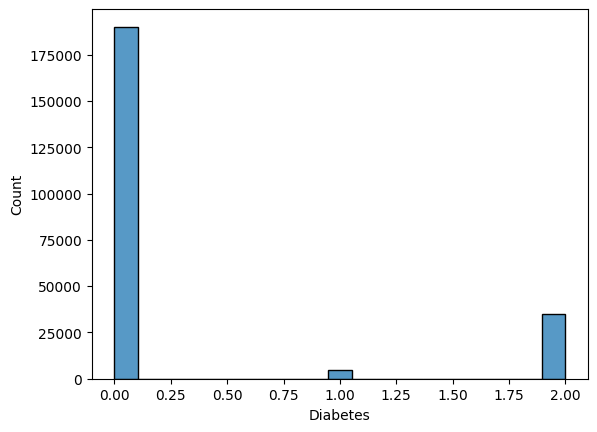

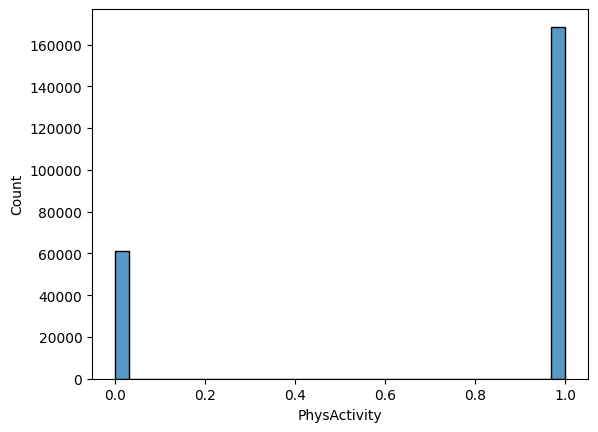

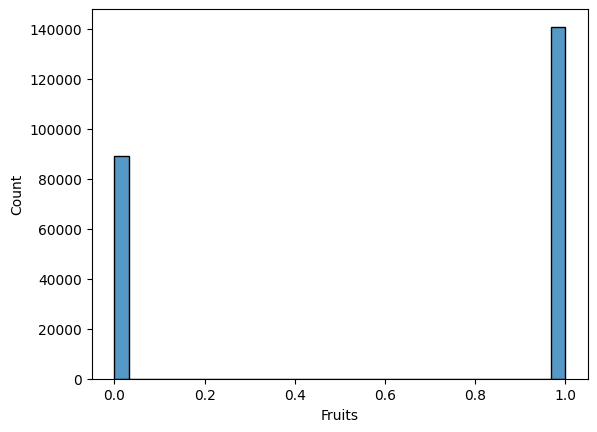

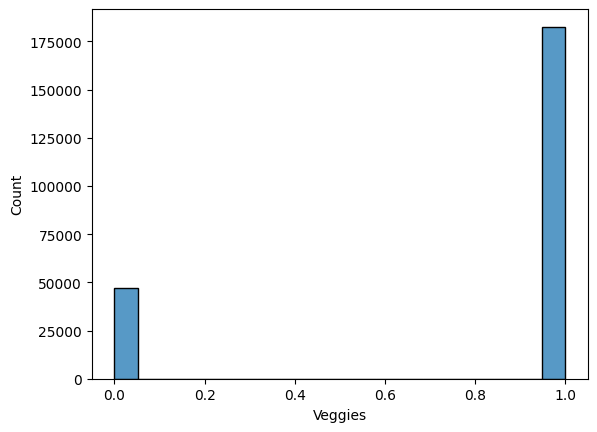

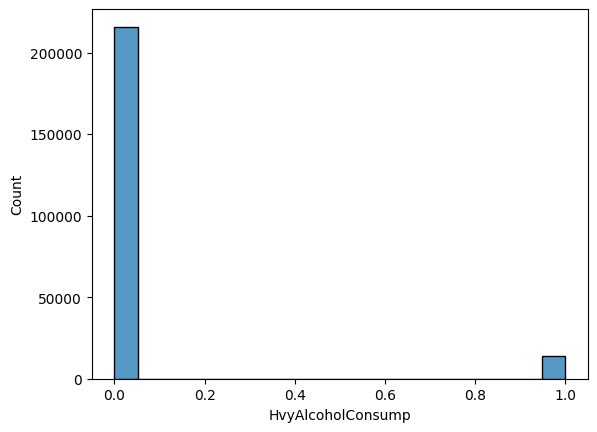

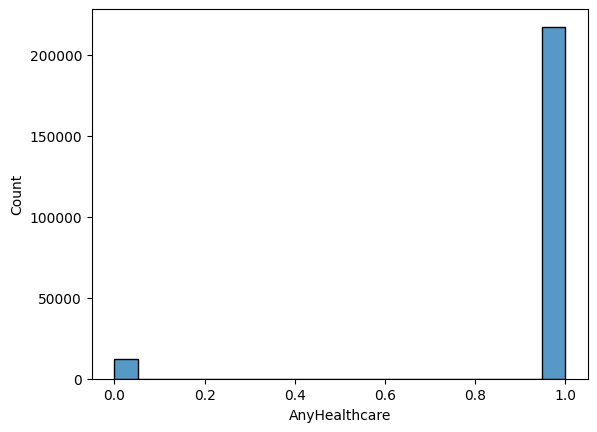

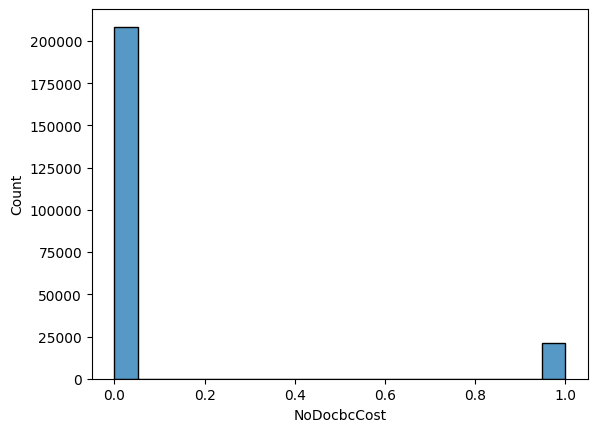

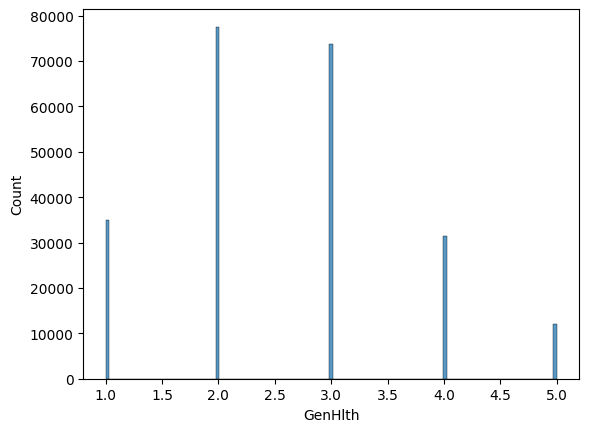

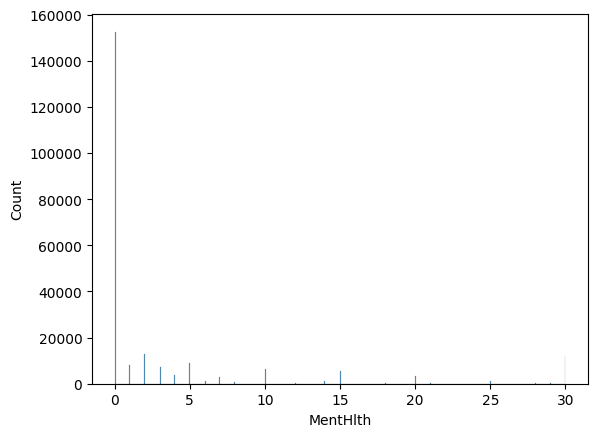

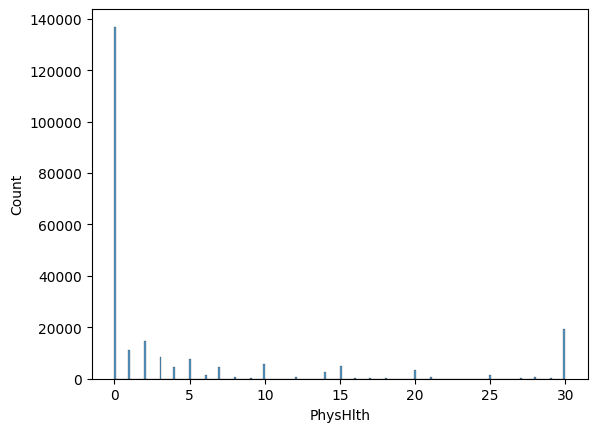

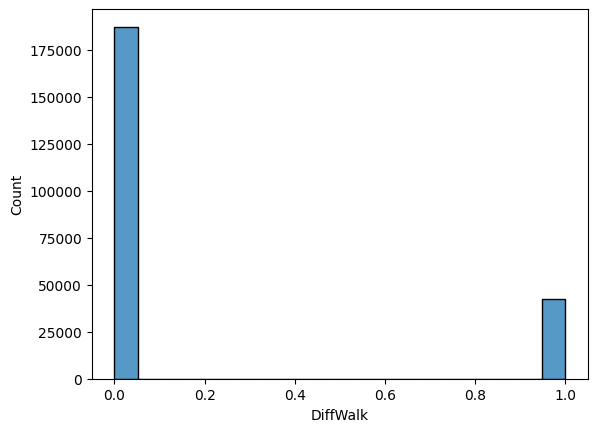

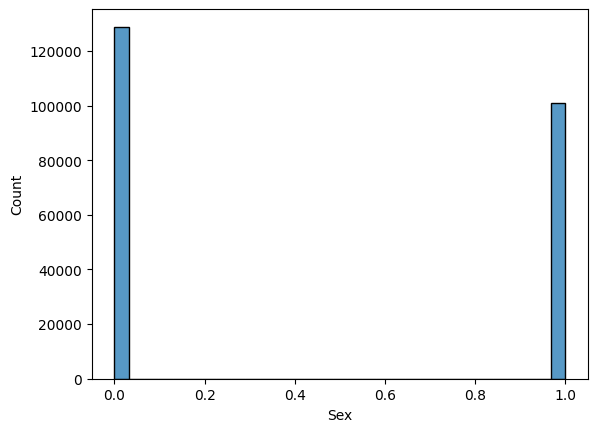

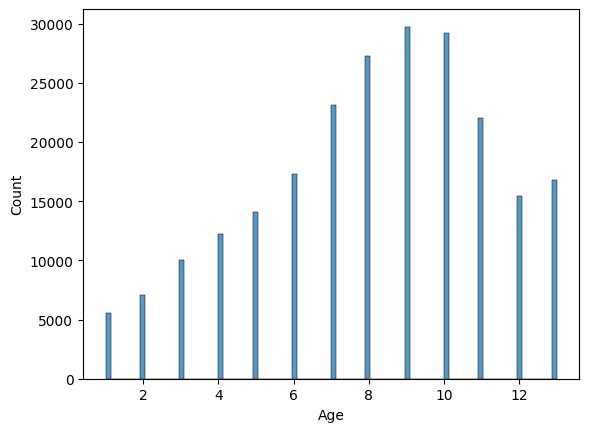

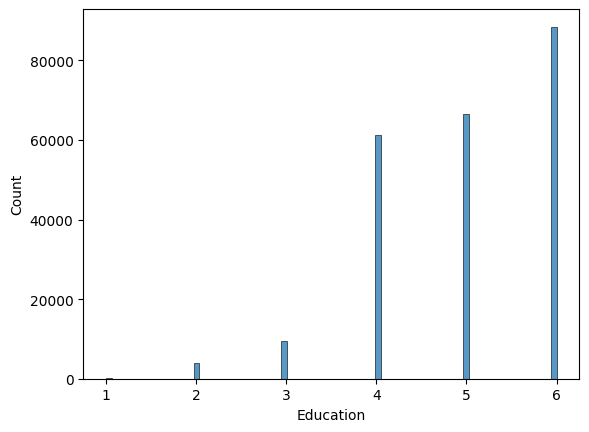

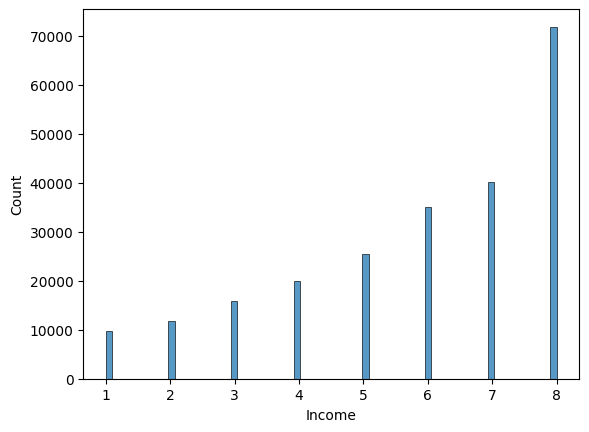

In [24]:
for i in df.select_dtypes(include=np.number):
  sns.histplot(df[i])
  plt.show()

In [25]:
categories = {"Male":1, "Female":0} #Replace categorical values with numbers
df['Sex'] = df['Sex'].replace(categories)

Y = df["Label"].values
X = df.drop(labels = ["Label"], axis=1)

In [26]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets into 80,20 %
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(183824, 21)
(183824,)


In [27]:
from keras.utils import normalize
X = normalize(X, axis=1)

# Technique 1: Appropriate Model Selection

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train, y_train)
LR_prediction = model_LR.predict(X_test)

accuracy = metrics.accuracy_score(y_test, LR_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.9002981047500925


In [29]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train, y_train)
prediction_test_RF = model_RF.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test_RF)
print ("  Accuracy:", accuracy)

  Accuracy: 0.8914202406597471


In [30]:
from sklearn.ensemble import AdaBoostClassifier
model_Adaboost = AdaBoostClassifier()
model_Adaboost.fit(X_train, y_train)
prediction_test_Adaboost = model_Adaboost.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test_Adaboost)
print ("  Accuracy:", accuracy)

  Accuracy: 0.899667080096612


In [31]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
prediction_test_DT = model_DT.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test_DT)
print ("  Accuracy:", accuracy)

  Accuracy: 0.8356724764453729


In [32]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
prediction_test_NB = model_NB.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test_NB)
print ("  Accuracy:", accuracy)

  Accuracy: 0.8152838522967122


In [33]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)
prediction_test_KNN = model_KNN.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test_KNN)
print ("  Accuracy:", accuracy)

  Accuracy: 0.8863067650194747


In [34]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)
prediction_test_XGB = model_XGB.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test_XGB)
print ("  Accuracy:", accuracy)

  Accuracy: 0.8994494853885153


In [35]:
from lightgbm import LGBMClassifier
model_LGBM = XGBClassifier()
model_LGBM.fit(X_train, y_train)
prediction_test_LGBM = model_LGBM.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test_LGBM)
print ("  Accuracy:", accuracy)

  Accuracy: 0.8994494853885153


Random Forest

In [36]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train, y_train) # Train the model on training data

#importances = list(model_RF.feature_importances_)
features_list = list(X.columns)
feature_imp = pd.Series(model_RF.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

BMI                  0.193357
Age                  0.108796
Income               0.104901
PhysHlth             0.086810
Education            0.073497
GenHlth              0.066729
MentHlth             0.063724
Fruits               0.033636
Stroke               0.028555
Diabetes             0.028528
PhysActivity         0.028391
Veggies              0.027207
HighBP               0.026477
Sex                  0.023589
Smoker               0.023479
HighChol             0.023105
DiffWalk             0.022897
NoDocbcCost          0.014931
HvyAlcoholConsump    0.009463
AnyHealthcare        0.007890
CholCheck            0.004038
dtype: float64


In [37]:
prediction_test_RF = model_RF.predict(X_test) #Test prediction on testing data.
print("METRICS FOR IMBALANCED DATA: ") #ACCURACY METRICS
print ("  Accuracy =", metrics.accuracy_score(y_test, prediction_test_RF))
print()

(unique, counts) = np.unique(prediction_test_RF, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_test_RF)
print("Confusion Metrics: \n", cm)

METRICS FOR IMBALANCED DATA: 
  Accuracy = 0.8914202406597471

Count of predicted label: [0. 1.] [44473  1484]

Confusion Metrics: 
 [[40376   893]
 [ 4097   591]]


Precision Values for: 
  Healthy Patients with no disease = 0.9078766892271716
  Patients With Liver disease = 0.39824797843665766

Recall Values for: 
  Healthy Patients with no disease =  0.9783614819840558
  Healthy Patients With Liver disease =  0.1260665529010239

F-Measure Values for: 
  Healthy Patients with no disease =  0.9418021506379604
  Patients with liver disease =  0.19151004536616978

ROC_AUC score for imbalanced data is:  0.5522140174425398



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


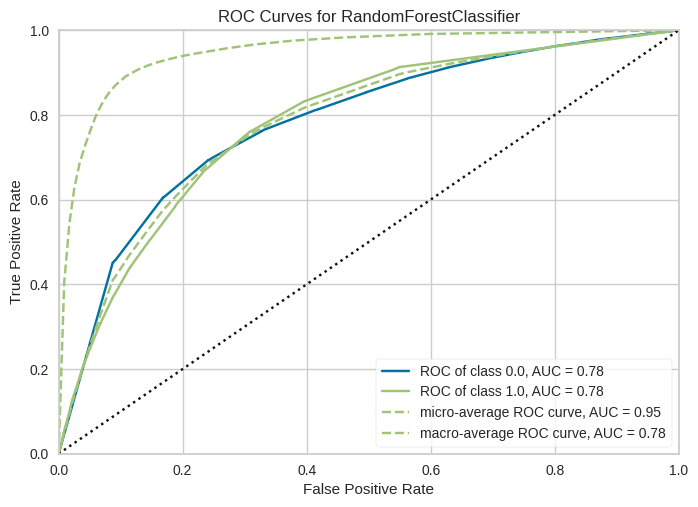

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [38]:
#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

from sklearn.metrics import roc_auc_score  #Version 0.23.1 of sklearn
print("ROC_AUC score for imbalanced data is: ", roc_auc_score(y_test, prediction_test_RF))
print()

from yellowbrick.classifier import ROCAUC

roc_auc=ROCAUC(model_RF)  #Create object
roc_auc.fit(X_train, y_train)
roc_auc.score(X_test, y_test)
roc_auc.show()

<ipython-input-39-b189838342a9>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-39-b189838342a9>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-39-b189838342a9>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-39-b189838342a9>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-39-b1

[LightGBM] [Info] Number of positive: 19029, number of negative: 164795
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 183824, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.103517 -> initscore=-2.158738
[LightGBM] [Info] Start training from score -2.158738


<ipython-input-39-b189838342a9>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-39-b189838342a9>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,


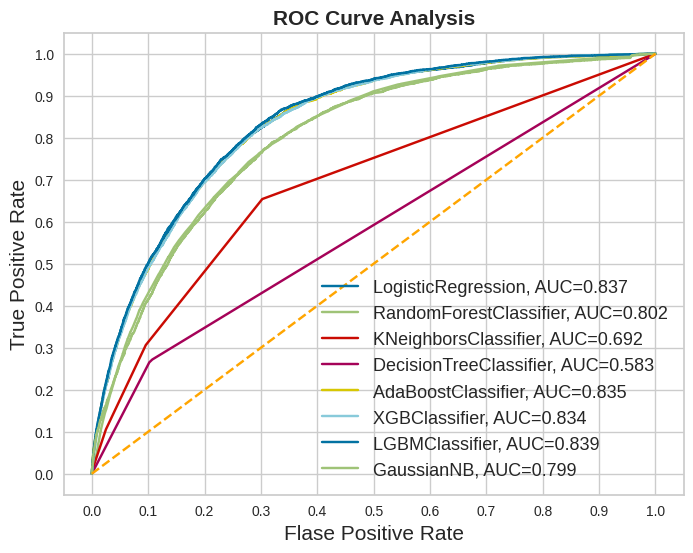

In [39]:
classifiers = [LogisticRegression(max_iter=900),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         DecisionTreeClassifier(),
         AdaBoostClassifier(),
         XGBClassifier(),
         LGBMClassifier(),
         GaussianNB()]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

# Handling Imbalanced data

Technique 1: Generate synthetic data
SMOTE: Synthetic Minority Oversampling Technique

https://imbalanced-learn.org/stable/over_sampling.html?highlight=smote

SMOTE may not be the best choice all the time. It is one of many things
that you need to explore.

In [40]:
from imblearn.over_sampling import SMOTE
X_smote, Y_smote = SMOTE().fit_resample(X, Y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)

Original data:  [0. 1.] [206064  23717]
After SMOTE:  [0. 1.] [206064 206064]


LOGISTIC REGRESSION


Accuracy: 0.7566059253148278

Count of predicted label: [0. 1.] [38374 44052]

Confusion Metrics: 
 [[29835 11523]
 [ 8539 32529]]

Precision Values for: 
  Healthy Patients with no disease = 0.7774795434408714
  Patients With Liver disease = 0.7384227730863525

Recall Values for: 
  Healthy Patients with no disease =  0.7213840127665748
  Healthy Patients With Liver disease =  0.7920765559559755

F-Measure Values for: 
  Healthy Patients with no disease =  0.7483820799678924
  Patients with liver disease =  0.7643092105263158

ROC AUC score for Logestic Regression model after SMOTE:  0.7567302843612751



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


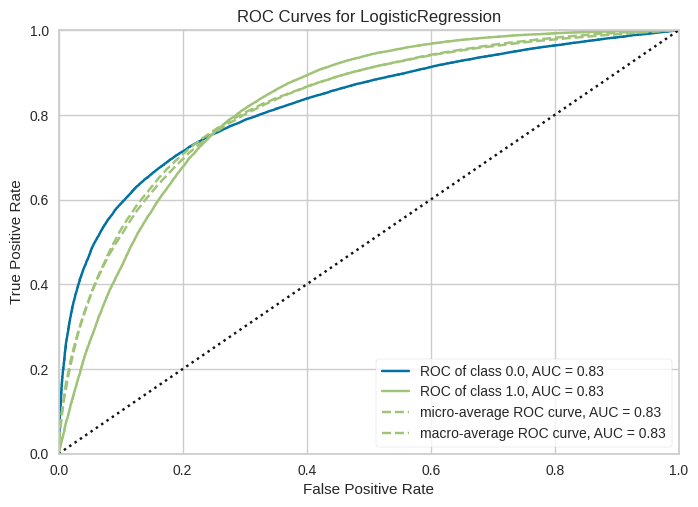

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [41]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smote, y_train_smote)
LR_prediction_smote = model_LR.predict(X_test_smote)

accuracy = metrics.accuracy_score(y_test_smote, LR_prediction_smote)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smote, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, LR_prediction_smote)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logestic Regression model after SMOTE: ",roc_auc_score(y_test_smote, LR_prediction_smote))
print()

roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

RANDOM FOREST

Accuracy =  0.9283842476888361

Count of predicted labels:  [0. 1.] [41709 40717]

Confusion Metrics after SMOTE: 
 [[38582  2776]
 [ 3127 37941]]

Precision Values for: 
  Healthy Patients with no disease = 0.9250281713778801
  Patients With Liver disease = 0.9318220890537122

Recall Values for: 
  Healthy Patients with no disease =  0.9328787658977706
  Healthy Patients With Liver disease =  0.9238579916236486

F-Measure Values for: 
  Healthy Patients with no disease =  0.9289368822757532
  Patients with liver disease =  0.9278229504187809

ROC AUC score for Random Forest model after SMOTE:  0.9283683787607095



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


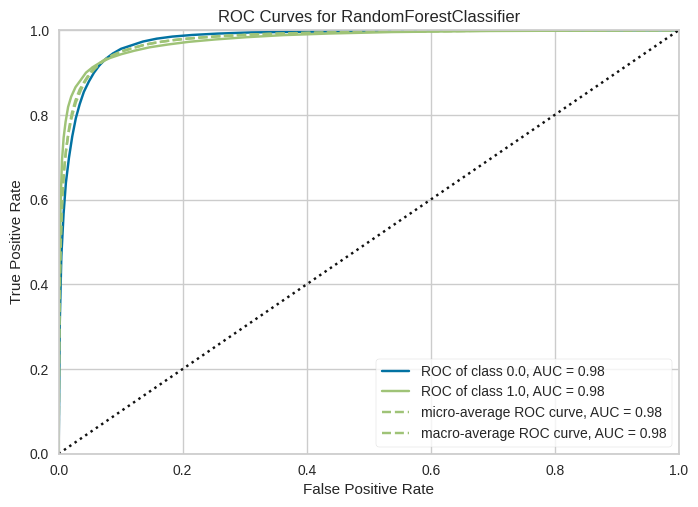

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [42]:
model_SMOTE = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_SMOTE.fit(X_train_smote, y_train_smote)

RF_prediction_smote = model_SMOTE.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, RF_prediction_smote))
print()

(unique, counts) = np.unique(RF_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, RF_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after SMOTE: ",roc_auc_score(y_test_smote, RF_prediction_smote))
print()

roc_auc=ROCAUC(model_SMOTE)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

KNN

Accuracy =  0.8518913934923447

Count of predicted labels:  [0. 1.] [29418 53008]

Confusion Metrics after SMOTE: 
 [[29284 12074]
 [  134 40934]]

Precision Values for: 
  Healthy Patients with no disease = 0.9954449656672786
  Patients With Liver disease = 0.7722230606700875

Recall Values for: 
  Healthy Patients with no disease =  0.7080613182455632
  Healthy Patients With Liver disease =  0.9967371189247103

F-Measure Values for: 
  Healthy Patients with no disease =  0.8275121510116424
  Patients with liver disease =  0.8702325779157277

ROC AUC score for KNN model after SMOTE:  0.8523992185851366



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


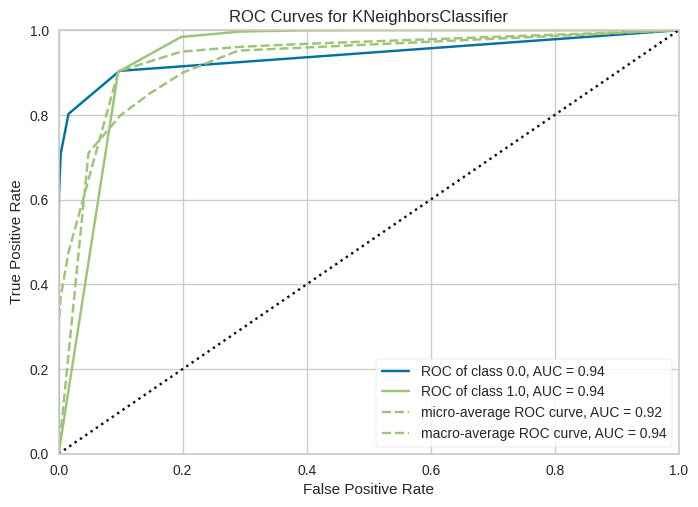

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [43]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smote, y_train_smote)

KNN_prediction_smote = model_KNN.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, KNN_prediction_smote))
print()

(unique, counts) = np.unique(KNN_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, KNN_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for KNN model after SMOTE: ",roc_auc_score(y_test_smote, KNN_prediction_smote))
print()

roc_auc=ROCAUC(model_KNN)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

Decision Tree


Accuracy =  0.8865285225535632

Count of predicted labels:  [0. 1.] [40737 41689]

Confusion Metrics after SMOTE: 
 [[36371  4987]
 [ 4366 36702]]

Precision Values for: 
  Healthy Patients with no disease = 0.8928247048138056
  Patients With Liver disease = 0.8803761184005373

Recall Values for: 
  Healthy Patients with no disease =  0.8794187339813337
  Healthy Patients With Liver disease =  0.8936885166066036

F-Measure Values for: 
  Healthy Patients with no disease =  0.8860710152871673
  Patients with liver disease =  0.8869823700714139

ROC AUC score for Decision Tree model after SMOTE:  0.8865536252939688



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


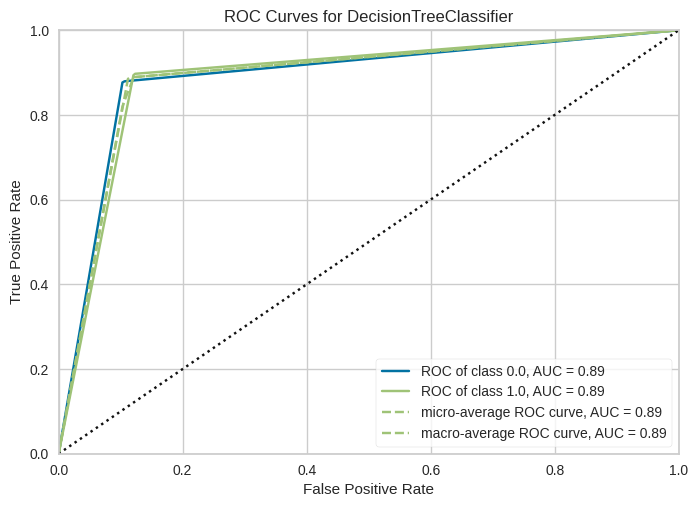

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [44]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smote, y_train_smote)

DT_prediction_smote = model_DT.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, DT_prediction_smote))
print()

(unique, counts) = np.unique(DT_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, DT_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Decision Tree model after SMOTE: ",roc_auc_score(y_test_smote, DT_prediction_smote))
print()

roc_auc=ROCAUC(model_DT)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

ADABOOST

Accuracy =  0.8500958435445126

Count of predicted labels:  [0. 1.] [40156 42270]

Confusion Metrics after SMOTE: 
 [[34579  6779]
 [ 5577 35491]]

Precision Values for: 
  Healthy Patients with no disease = 0.8611166450841717
  Patients With Liver disease = 0.8396262124438135

Recall Values for: 
  Healthy Patients with no disease =  0.8360897528894047
  Healthy Patients With Liver disease =  0.8642008376351417

F-Measure Values for: 
  Healthy Patients with no disease =  0.8484186765463602
  Patients with liver disease =  0.851736302767045

ROC AUC score for AdaBoost model after SMOTE:  0.8501452952622731



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


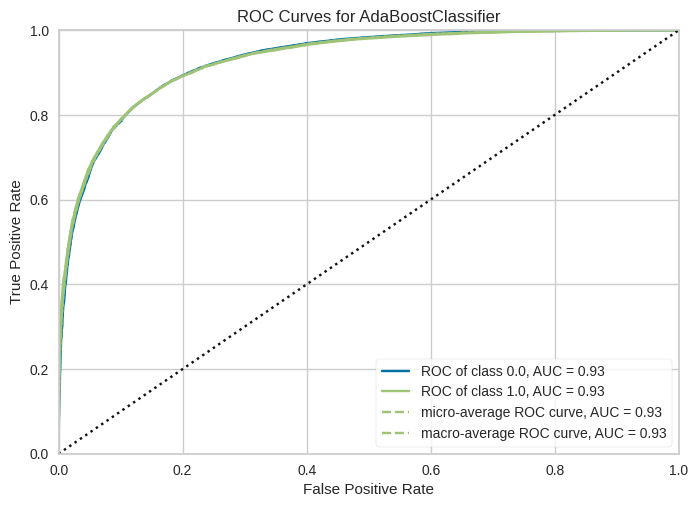

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [45]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smote, y_train_smote)

AdaBoost_prediction_smote = model_AdaBoost.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, AdaBoost_prediction_smote))
print()

(unique, counts) = np.unique(AdaBoost_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, AdaBoost_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for AdaBoost model after SMOTE: ",roc_auc_score(y_test_smote, AdaBoost_prediction_smote))
print()

roc_auc=ROCAUC(model_AdaBoost)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

XGBoost

Accuracy =  0.9088515759590421

Count of predicted labels:  [0 1] [43439 38987]

Confusion Metrics after SMOTE: 
 [[38642  2716]
 [ 4797 36271]]

Precision Values for: 
  Healthy Patients with no disease = 0.8895692810607979
  Patients With Liver disease = 0.9303357529432887

Recall Values for: 
  Healthy Patients with no disease =  0.9343295130325451
  Healthy Patients With Liver disease =  0.8831937274763806

F-Measure Values for: 
  Healthy Patients with no disease =  0.9114001674587545
  Patients with liver disease =  0.9061520204859159

ROC AUC score for XGBoost model after SMOTE:  0.9087616202544628



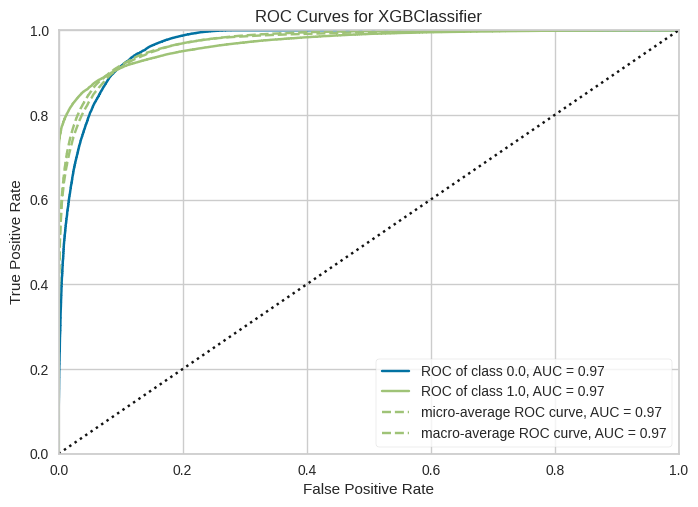

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [46]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smote, y_train_smote)

XGB_prediction_smote = model_XGB.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, XGB_prediction_smote))
print()

(unique, counts) = np.unique(XGB_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, XGB_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for XGBoost model after SMOTE: ",roc_auc_score(y_test_smote, XGB_prediction_smote))
print()

roc_auc=ROCAUC(model_XGB)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

LIGHT GBM

[LightGBM] [Info] Number of positive: 164996, number of negative: 164706
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 329702, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500440 -> initscore=0.001759
[LightGBM] [Info] Start training from score 0.001759
Accuracy =  0.8992065610365662

Count of predicted labels:  [0. 1.] [43092 39334]

Confusion Metrics after SMOTE: 
 [[38071  3287]
 [ 5021 36047]]

Precision Values for: 
  Healthy Patients with no disease = 0.8834818527800984
  Patients With Liver disease = 0.9164336197691565

Recall Values for: 
  Healthy Patients with no disease =  0.9205232361332754
  Healthy Patients With Liver disease =  0.8777393591117172

F-Measure Values for:

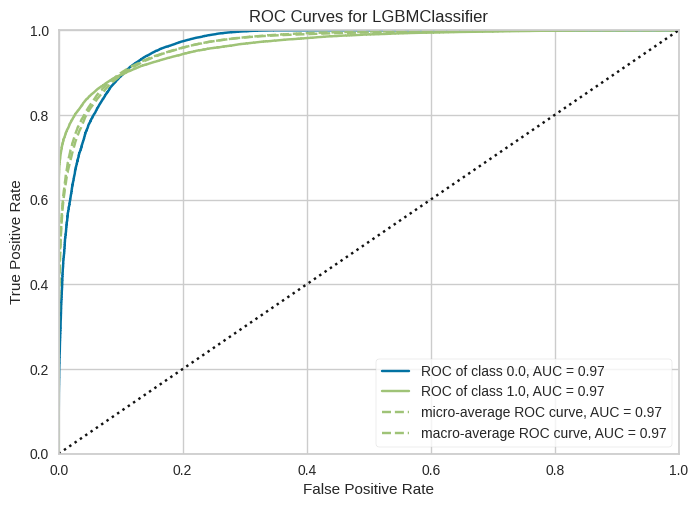

<Axes: title={'center': 'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [47]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smote, y_train_smote)

LGBM_prediction_smote = model_LGBM.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, LGBM_prediction_smote))
print()

(unique, counts) = np.unique(LGBM_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, LGBM_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for LightGBoost model after SMOTE: ",roc_auc_score(y_test_smote, LGBM_prediction_smote))
print()

roc_auc=ROCAUC(model_LGBM)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

Gaussian Naive Bayes

Accuracy =  0.7260815762016839

Count of predicted labels:  [0. 1.] [40692 41734]

Confusion Metrics after SMOTE: 
 [[29736 11622]
 [10956 30112]]

Precision Values for: 
  Healthy Patients with no disease = 0.7307578885284577
  Patients With Liver disease = 0.7215220204150093

Recall Values for: 
  Healthy Patients with no disease =  0.718990279994197
  Healthy Patients With Liver disease =  0.7332229473069056

F-Measure Values for: 
  Healthy Patients with no disease =  0.7248263254113345
  Patients with liver disease =  0.727325426922055

ROC AUC score for Gaussian Naive Bayes model after SMOTE:  0.7261066136505513



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


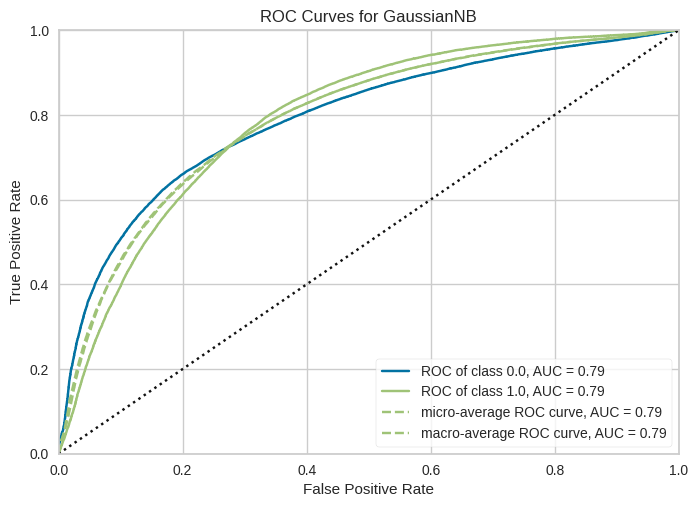

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [48]:
model_NB = GaussianNB()
model_NB.fit(X_train_smote, y_train_smote)

NB_prediction_smote = model_NB.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, NB_prediction_smote))
print()

(unique, counts) = np.unique(NB_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, NB_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Gaussian Naive Bayes model after SMOTE: ",roc_auc_score(y_test_smote, NB_prediction_smote))
print()

roc_auc=ROCAUC(model_NB)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

<ipython-input-49-20e24c8a917f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-49-20e24c8a917f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-49-20e24c8a917f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-49-20e24c8a917f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-49-20

[LightGBM] [Info] Number of positive: 164996, number of negative: 164706
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 329702, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500440 -> initscore=0.001759
[LightGBM] [Info] Start training from score 0.001759


<ipython-input-49-20e24c8a917f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-49-20e24c8a917f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,


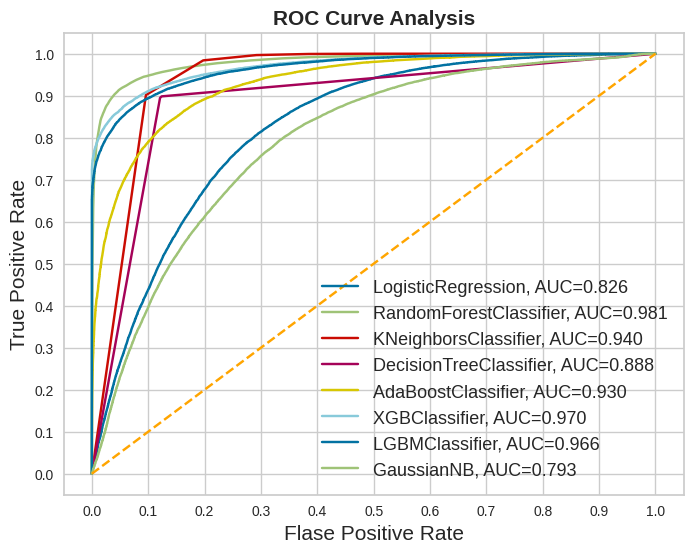

In [49]:
classifiers = [LogisticRegression(max_iter=900),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         DecisionTreeClassifier(),
         AdaBoostClassifier(),
         XGBClassifier(),
         LGBMClassifier(),
         GaussianNB()]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(X_train_smote, y_train_smote)
    yproba = model.predict_proba(X_test_smote)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test_smote, yproba)
    auc = roc_auc_score(y_test_smote, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#Handling Imbalanced Data using SMOTEENN
It combines SMOTE and Edited Nearest Neighbours(ENN)

In [50]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, Y)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(y_resampled, return_counts=True)
print("After SMOTEENN: ", unique2, counts2)

X_train_smoteenn, X_test_smoteenn, y_train_smoteenn, y_test_smoteenn = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Original data:  [0. 1.] [206064  23717]
After SMOTEENN:  [0. 1.] [135539 198309]


Logistic Regression

Accuracy of Logistic Regression after SMOTEENN: 0.8501722330387899

Count of predicted label: [0. 1.] [25102 41668]

Confusion Metrics: 
 [[21063  5965]
 [ 4039 35703]]

Precision Values for: 
  Healthy Patients with no disease = 0.8390964863357502
  Patients With Liver disease = 0.8568445809734089

Recall Values for: 
  Healthy Patients with no disease =  0.7793029450939766
  Healthy Patients With Liver disease =  0.8983694831664234

F-Measure Values for: 
  Healthy Patients with no disease =  0.8080951467485133
  Patients with liver disease =  0.8771158334356959

ROC AUC score for Logistic Regression model after SMOTEENN:  0.8388362141301999



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


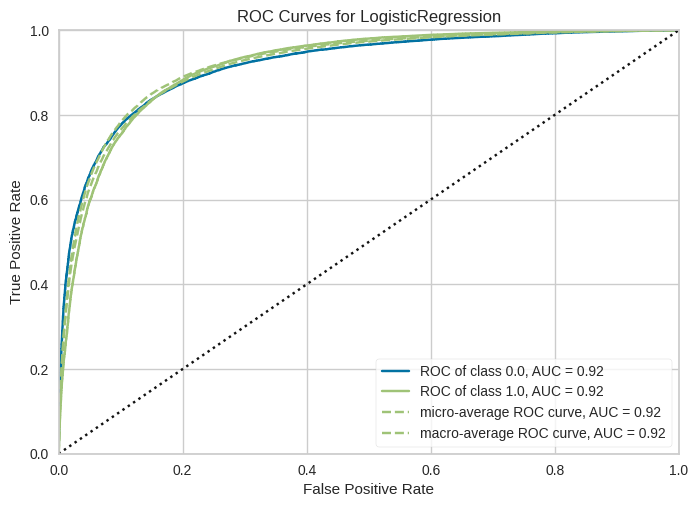

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [51]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smoteenn, y_train_smoteenn)
LR_prediction_smoteenn = model_LR.predict(X_test_smoteenn)

accuracy = metrics.accuracy_score(y_test_smoteenn, LR_prediction_smoteenn)
print("Accuracy of Logistic Regression after SMOTEENN:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smoteenn, LR_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logistic Regression model after SMOTEENN: ", roc_auc_score(y_test_smoteenn, LR_prediction_smoteenn))
print()

roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_smoteenn, y_train_smoteenn)
roc_auc.score(X_test_smoteenn, y_test_smoteenn)
roc_auc.show()

RANDOM FOREST

Accuracy of Random Forest after SMOTEENN =  0.9514153062752734

Count of predicted labels:  [0. 1.] [26548 40222]

Confusion Metrics after SMOTEENN: 
 [[25166  1862]
 [ 1382 38360]]

Precision Values for: 
  Healthy Patients with no disease = 0.9479433478981467
  Patients With Liver disease = 0.9537069265576053

Recall Values for: 
  Healthy Patients with no disease =  0.9311084800947166
  Healthy Patients With Liver disease =  0.9652257058024256

F-Measure Values for: 
  Healthy Patients with no disease =  0.9394505002239809
  Patients with liver disease =  0.9594317442849283

ROC AUC score for Random Forest model after SMOTEENN:  0.9481670929485712



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


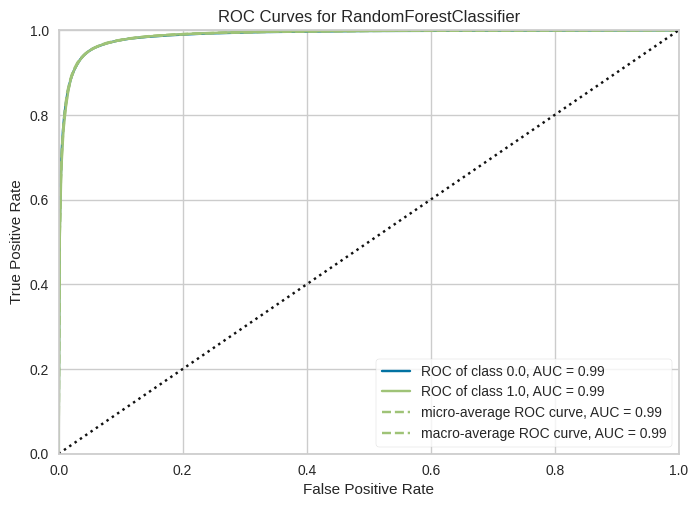

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [52]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_smoteenn, y_train_smoteenn)

RF_prediction_smoteenn = model_RF.predict(X_test_smoteenn)
print ("Accuracy of Random Forest after SMOTEENN = ", metrics.accuracy_score(y_test_smoteenn, RF_prediction_smoteenn))
print()

(unique, counts) = np.unique(RF_prediction_smoteenn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, RF_prediction_smoteenn)
print("Confusion Metrics after SMOTEENN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after SMOTEENN: ",roc_auc_score(y_test_smoteenn, RF_prediction_smoteenn))
print()

roc_auc=ROCAUC(model_RF)
roc_auc.fit(X_train_smoteenn, y_train_smoteenn)
roc_auc.score(X_test_smoteenn, y_test_smoteenn)
roc_auc.show()

KNN

Accuracy =  0.9525385652239029

Count of predicted labels:  [0. 1.] [23969 42801]

Confusion Metrics after SMOTEENN: 
 [[23914  3114]
 [   55 39687]]

Precision Values for: 
  Healthy Patients with no disease = 0.9977053694355209
  Patients With Liver disease = 0.9272446905446134

Recall Values for: 
  Healthy Patients with no disease =  0.8847861476986828
  Healthy Patients With Liver disease =  0.9986160736752051

F-Measure Values for: 
  Healthy Patients with no disease =  0.9378590897503774
  Patients with liver disease =  0.9616078892213754

ROC AUC score for KNN model after SMOTEENN:  0.941701110686944



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


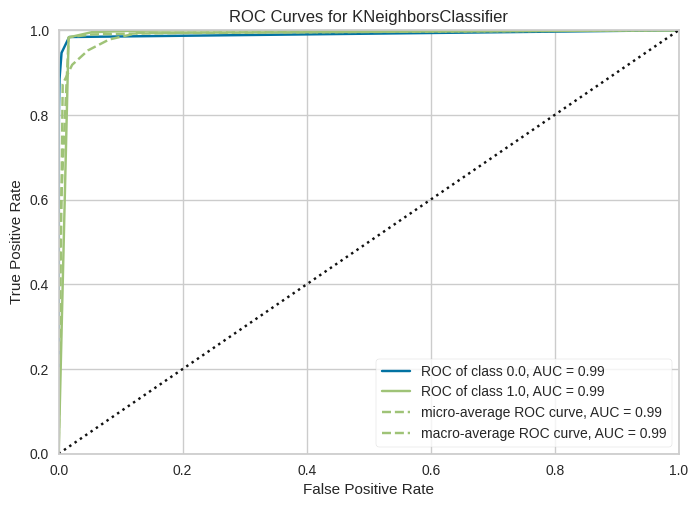

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [53]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smoteenn, y_train_smoteenn)

KNN_prediction_smoteenn = model_KNN.predict(X_test_smoteenn)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteenn, KNN_prediction_smoteenn))
print()

(unique, counts) = np.unique(KNN_prediction_smoteenn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, KNN_prediction_smoteenn)
print("Confusion Metrics after SMOTEENN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for KNN model after SMOTEENN: ",roc_auc_score(y_test_smoteenn, KNN_prediction_smoteenn))
print()

roc_auc=ROCAUC(model_KNN)
roc_auc.fit(X_train_smoteenn, y_train_smoteenn)
roc_auc.score(X_test_smoteenn, y_test_smoteenn)
roc_auc.show()

Decision Tree

Accuracy =  0.9210873146622734

Count of predicted labels:  [0. 1.] [26653 40117]

Confusion Metrics after SMOTEENN: 
 [[24206  2822]
 [ 2447 37295]]

Precision Values for: 
  Healthy Patients with no disease = 0.9081904476043973
  Patients With Liver disease = 0.9296557569110352

Recall Values for: 
  Healthy Patients with no disease =  0.8955897587686843
  Healthy Patients With Liver disease =  0.938427859695033

F-Measure Values for: 
  Healthy Patients with no disease =  0.901846090795626
  Patients with liver disease =  0.9340212123868318

ROC AUC score for Decision Tree model after SMOTEENN:  0.9170088092318586



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


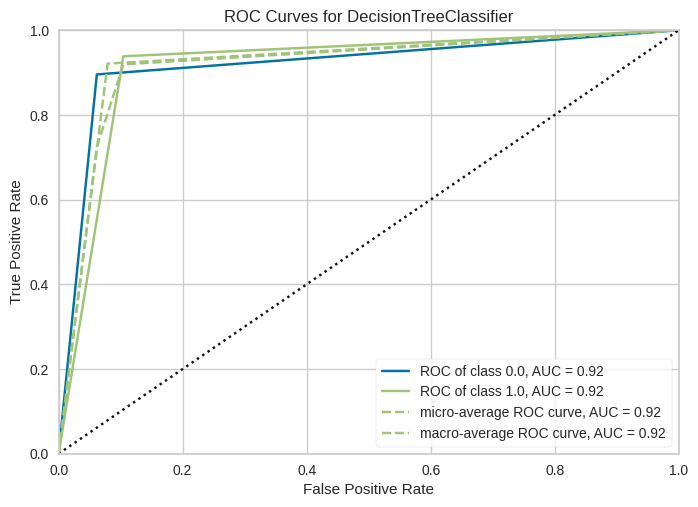

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [54]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smoteenn, y_train_smoteenn)

DT_prediction_smoteenn = model_DT.predict(X_test_smoteenn)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteenn, DT_prediction_smoteenn))
print()

(unique, counts) = np.unique(DT_prediction_smoteenn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, DT_prediction_smoteenn)
print("Confusion Metrics after SMOTEENN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Decision Tree model after SMOTEENN: ",roc_auc_score(y_test_smoteenn, DT_prediction_smoteenn))
print()

roc_auc=ROCAUC(model_DT)
roc_auc.fit(X_train_smoteenn, y_train_smoteenn)
roc_auc.score(X_test_smoteenn, y_test_smoteenn)
roc_auc.show()

AdaBoost

Accuracy =  0.9050921072337876

Count of predicted labels:  [0. 1.] [26289 40481]

Confusion Metrics after SMOTEENN: 
 [[23490  3538]
 [ 2799 36943]]

Precision Values for: 
  Healthy Patients with no disease = 0.8935296131461828
  Patients With Liver disease = 0.9126009732961142

Recall Values for: 
  Healthy Patients with no disease =  0.869098712446352
  Healthy Patients With Liver disease =  0.9295707312163455

F-Measure Values for: 
  Healthy Patients with no disease =  0.8811448506104994
  Patients with liver disease =  0.921007691061167

ROC AUC score for AdaBoost model after SMOTEENN:  0.8993347218313488



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


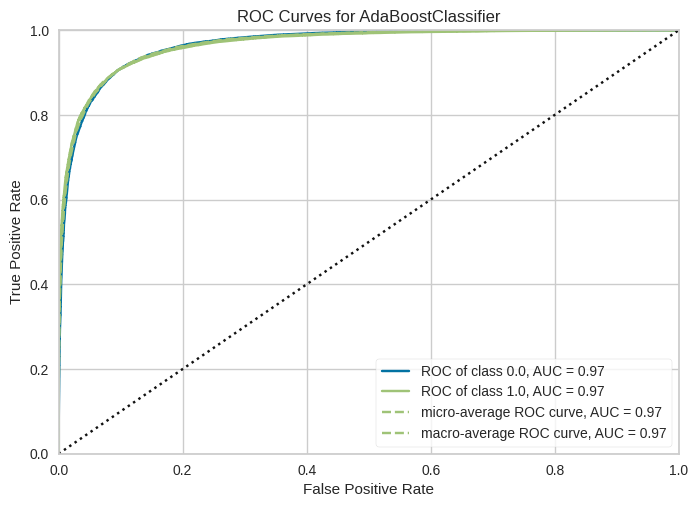

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [55]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smoteenn, y_train_smoteenn)

AdaBoost_prediction_smoteenn = model_AdaBoost.predict(X_test_smoteenn)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteenn, AdaBoost_prediction_smoteenn))
print()

(unique, counts) = np.unique(AdaBoost_prediction_smoteenn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, AdaBoost_prediction_smoteenn)
print("Confusion Metrics after SMOTEENN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for AdaBoost model after SMOTEENN: ",roc_auc_score(y_test_smoteenn, AdaBoost_prediction_smoteenn))
print()

roc_auc=ROCAUC(model_AdaBoost)
roc_auc.fit(X_train_smoteenn, y_train_smoteenn)
roc_auc.score(X_test_smoteenn, y_test_smoteenn)
roc_auc.show()

XGBOOST

Accuracy =  0.9412610453796615

Count of predicted labels:  [0 1] [27258 39512]

Confusion Metrics after SMOTEENN: 
 [[25182  1846]
 [ 2076 37666]]

Precision Values for: 
  Healthy Patients with no disease = 0.9238388729914153
  Patients With Liver disease = 0.9532800161976108

Recall Values for: 
  Healthy Patients with no disease =  0.9317004587834838
  Healthy Patients With Liver disease =  0.9477630718131951

F-Measure Values for: 
  Healthy Patients with no disease =  0.9277530118262536
  Patients with liver disease =  0.9505135387488329

ROC AUC score for XGBoost model after SMOTEENN:  0.9397317652983395



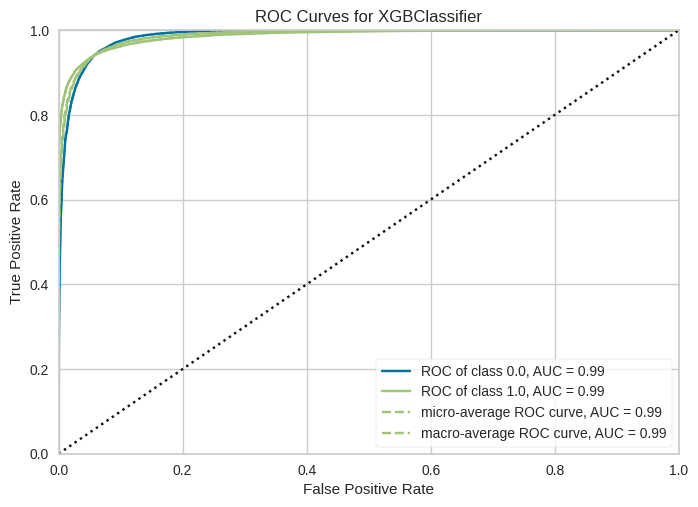

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [56]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smoteenn, y_train_smoteenn)

XGB_prediction_smoteenn = model_XGB.predict(X_test_smoteenn)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteenn, XGB_prediction_smoteenn))
print()

(unique, counts) = np.unique(XGB_prediction_smoteenn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, XGB_prediction_smoteenn)
print("Confusion Metrics after SMOTEENN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for XGBoost model after SMOTEENN: ",roc_auc_score(y_test_smoteenn, XGB_prediction_smoteenn))
print()

roc_auc=ROCAUC(model_XGB)
roc_auc.fit(X_train_smoteenn, y_train_smoteenn)
roc_auc.score(X_test_smoteenn, y_test_smoteenn)
roc_auc.show()

Light GBM

[LightGBM] [Info] Number of positive: 158567, number of negative: 108511
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 267078, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.593710 -> initscore=0.379326
[LightGBM] [Info] Start training from score 0.379326
Accuracy =  0.9331885577355099

Count of predicted labels:  [0. 1.] [27153 39617]

Confusion Metrics after SMOTEENN: 
 [[24860  2168]
 [ 2293 37449]]

Precision Values for: 
  Healthy Patients with no disease = 0.9155526092881081
  Patients With Liver disease = 0.9452760178711159

Recall Values for: 
  Healthy Patients with no disease =  0.9197868876720438
  Healthy Patients With Liver disease =  0.9423028534044587

F-Measure Values f

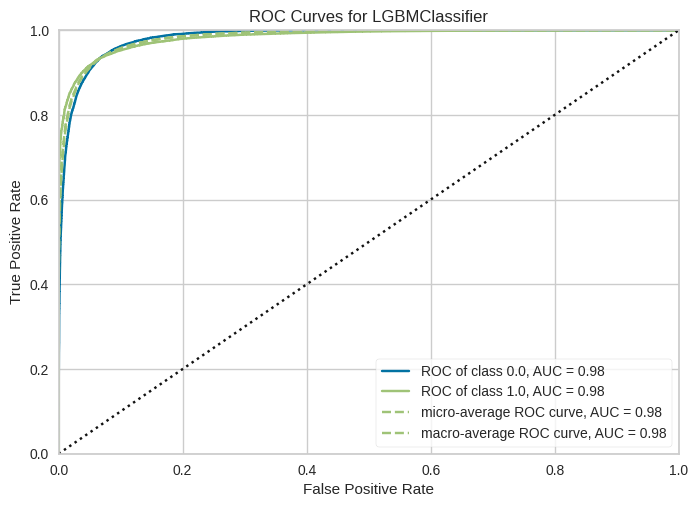

<Axes: title={'center': 'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [57]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smoteenn, y_train_smoteenn)

LGBM_prediction_smoteenn = model_LGBM.predict(X_test_smoteenn)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteenn, LGBM_prediction_smoteenn))
print()

(unique, counts) = np.unique(LGBM_prediction_smoteenn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, LGBM_prediction_smoteenn)
print("Confusion Metrics after SMOTEENN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for LGBMoost model after SMOTEENN: ",roc_auc_score(y_test_smoteenn, LGBM_prediction_smoteenn))
print()

roc_auc=ROCAUC(model_LGBM)
roc_auc.fit(X_train_smoteenn, y_train_smoteenn)
roc_auc.score(X_test_smoteenn, y_test_smoteenn)
roc_auc.show()

GAUSSIAN MAIVE BAYES

Accuracy =  0.7843043282911487

Count of predicted labels:  [0. 1.] [31242 35528]

Confusion Metrics after SMOTEENN: 
 [[21934  5094]
 [ 9308 30434]]

Precision Values for: 
  Healthy Patients with no disease = 0.7020677293387108
  Patients With Liver disease = 0.8566201306012159

Recall Values for: 
  Healthy Patients with no disease =  0.8115287849637413
  Healthy Patients With Liver disease =  0.7657893412510693

F-Measure Values for: 
  Healthy Patients with no disease =  0.7528402265316629
  Patients with liver disease =  0.8086621495947921

ROC AUC score for Gaussian Naive Bayes model after SMOTEENN:  0.7886590631074054



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


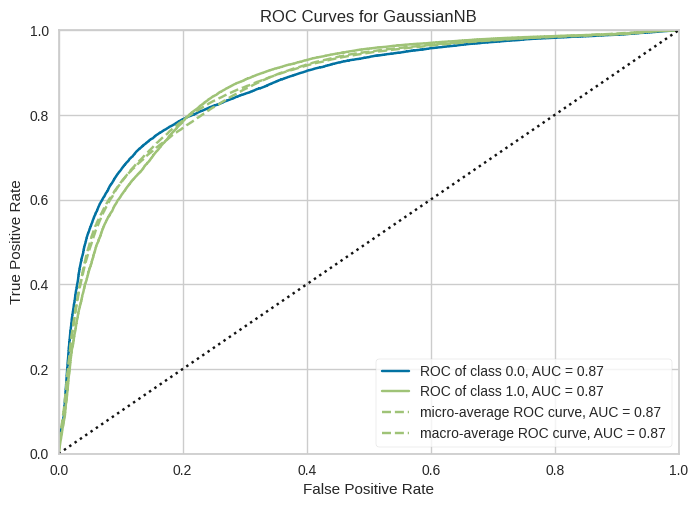

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [58]:
model_NB = GaussianNB()
model_NB.fit(X_train_smoteenn, y_train_smoteenn)

NB_prediction_smoteenn = model_NB.predict(X_test_smoteenn)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteenn, NB_prediction_smoteenn))
print()

(unique, counts) = np.unique(NB_prediction_smoteenn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, NB_prediction_smoteenn)
print("Confusion Metrics after SMOTEENN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Gaussian Naive Bayes model after SMOTEENN: ",roc_auc_score(y_test_smoteenn, NB_prediction_smoteenn))
print()

roc_auc=ROCAUC(model_NB)
roc_auc.fit(X_train_smoteenn, y_train_smoteenn)
roc_auc.score(X_test_smoteenn, y_test_smoteenn)
roc_auc.show()

<ipython-input-59-95014a1c568d>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-59-95014a1c568d>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-59-95014a1c568d>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-59-95014a1c568d>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-59-95

[LightGBM] [Info] Number of positive: 158567, number of negative: 108511
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 267078, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.593710 -> initscore=0.379326
[LightGBM] [Info] Start training from score 0.379326


<ipython-input-59-95014a1c568d>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-59-95014a1c568d>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,


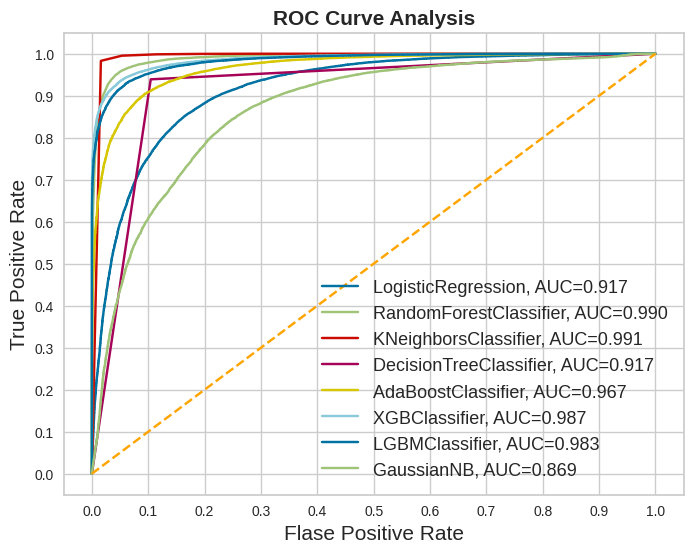

In [59]:
classifiers = [LogisticRegression(max_iter=900),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         DecisionTreeClassifier(),
         AdaBoostClassifier(),
         XGBClassifier(),
         LGBMClassifier(),
         GaussianNB()]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(X_train_smoteenn, y_train_smoteenn)
    yproba = model.predict_proba(X_test_smoteenn)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test_smoteenn, yproba)
    auc = roc_auc_score(y_test_smoteenn, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#Handling Imbalanced Data using SMOTETomek
It combines SMOTE and Tomek

In [60]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, Y)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(y_resampled, return_counts=True)
print("After SMOTEENN: ", unique2, counts2)

X_train_smoteTomek, X_test_smoteTomek, y_train_smoteTomek, y_test_smoteTomek = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Original data:  [0. 1.] [206064  23717]
After SMOTEENN:  [0. 1.] [205841 205841]


Logistic Regression

Accuracy of Logistic Regression after SMOTETomek: 0.7566464651371801

Count of predicted label: [0. 1.] [38554 43783]

Confusion Metrics: 
 [[29893 11376]
 [ 8661 32407]]

Precision Values for: 
  Healthy Patients with no disease = 0.7753540488665249
  Patients With Liver disease = 0.7401731265559692

Recall Values for: 
  Healthy Patients with no disease =  0.7243451501126754
  Healthy Patients With Liver disease =  0.7891058731859355

F-Measure Values for: 
  Healthy Patients with no disease =  0.7489821229470203
  Patients with liver disease =  0.7638566428209449

ROC AUC score for Logistic Regression model after SMOTETomek:  0.7567255116493055



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


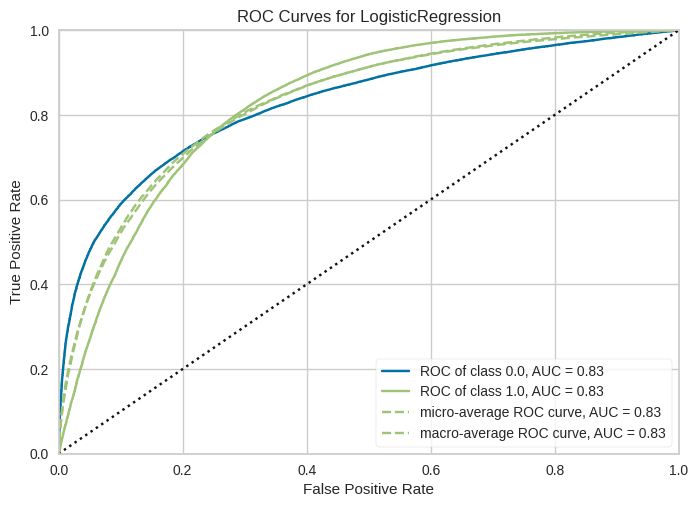

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [61]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smoteTomek, y_train_smoteTomek)
LR_prediction_smoteTomek = model_LR.predict(X_test_smoteTomek)

accuracy = metrics.accuracy_score(y_test_smoteTomek, LR_prediction_smoteTomek)
print("Accuracy of Logistic Regression after SMOTETomek:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smoteTomek, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smoteTomek, LR_prediction_smoteTomek)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logistic Regression model after SMOTETomek: ", roc_auc_score(y_test_smoteTomek, LR_prediction_smoteTomek))
print()

roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_smoteTomek, y_train_smoteTomek)
roc_auc.score(X_test_smoteTomek, y_test_smoteTomek)
roc_auc.show()

RANDOM FOREST

Accuracy of Random Forest after SMOTETomek =  0.9272987842646684

Count of predicted labels:  [0. 1.] [41869 40468]

Confusion Metrics after SMOTETomek: 
 [[38576  2693]
 [ 3293 37775]]

Precision Values for: 
  Healthy Patients with no disease = 0.9213499247653395
  Patients With Liver disease = 0.9334535929623407

Recall Values for: 
  Healthy Patients with no disease =  0.934745208267707
  Healthy Patients With Liver disease =  0.9198159150676926

F-Measure Values for: 
  Healthy Patients with no disease =  0.9279992301955784
  Patients with liver disease =  0.9265845761381476

ROC AUC score for Random Forest model after SMOTETomek:  0.9272805616676998



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


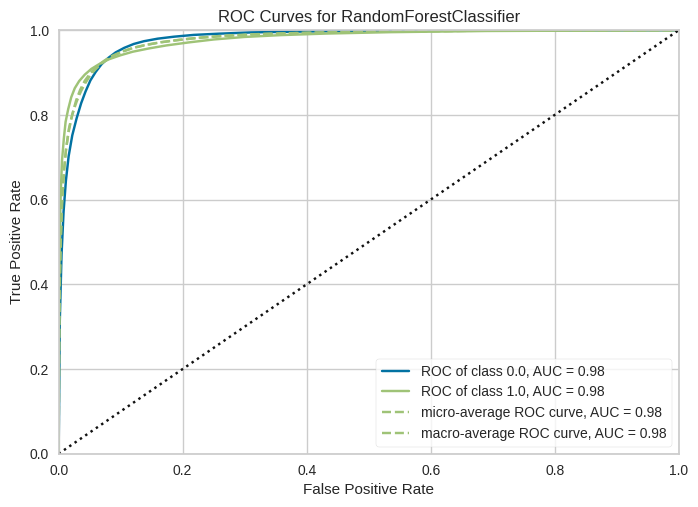

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [62]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_smoteTomek, y_train_smoteTomek)

RF_prediction_smoteTomek = model_RF.predict(X_test_smoteTomek)
print ("Accuracy of Random Forest after SMOTETomek = ", metrics.accuracy_score(y_test_smoteTomek, RF_prediction_smoteTomek))
print()

(unique, counts) = np.unique(RF_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, RF_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after SMOTETomek: ",roc_auc_score(y_test_smoteTomek, RF_prediction_smoteTomek))
print()

roc_auc=ROCAUC(model_RF)
roc_auc.fit(X_train_smoteTomek, y_train_smoteTomek)
roc_auc.score(X_test_smoteTomek, y_test_smoteTomek)
roc_auc.show()

KNN

Accuracy =  0.8527757873131157

Count of predicted labels:  [0. 1.] [29475 52862]

Confusion Metrics after SMOTETomek: 
 [[29311 11958]
 [  164 40904]]

Precision Values for: 
  Healthy Patients with no disease = 0.9944359626802375
  Patients With Liver disease = 0.7737883545836328

Recall Values for: 
  Healthy Patients with no disease =  0.7102425549443893
  Healthy Patients With Liver disease =  0.9960066231615856

F-Measure Values for: 
  Healthy Patients with no disease =  0.8286497794865996
  Patients with liver disease =  0.870946449483658

ROC AUC score for KNN model after SMOTETomek:  0.8531245890529874



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


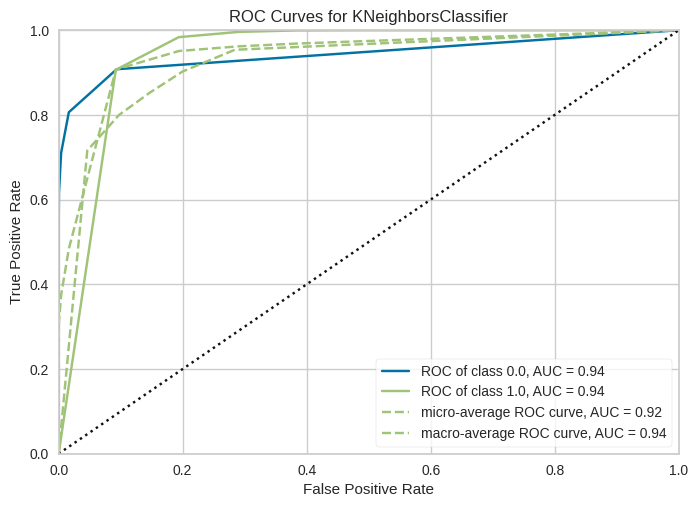

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [63]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smoteTomek, y_train_smoteTomek)

KNN_prediction_smoteTomek = model_KNN.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, KNN_prediction_smoteTomek))
print()

(unique, counts) = np.unique(KNN_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, KNN_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for KNN model after SMOTETomek: ",roc_auc_score(y_test_smoteTomek, KNN_prediction_smoteTomek))
print()

roc_auc=ROCAUC(model_KNN)
roc_auc.fit(X_train_smoteTomek, y_train_smoteTomek)
roc_auc.score(X_test_smoteTomek, y_test_smoteTomek)
roc_auc.show()

Decision Tree

Accuracy =  0.8843047475618495

Count of predicted labels:  [0. 1.] [40697 41640]

Confusion Metrics after SMOTETomek: 
 [[36220  5049]
 [ 4477 36591]]

Precision Values for: 
  Healthy Patients with no disease = 0.8899918912941986
  Patients With Liver disease = 0.8787463976945245

Recall Values for: 
  Healthy Patients with no disease =  0.8776563522256415
  Healthy Patients With Liver disease =  0.8909856822830428

F-Measure Values for: 
  Healthy Patients with no disease =  0.8837810799599835
  Patients with liver disease =  0.8848237171736713

ROC AUC score for Decision Tree model after SMOTETomek:  0.8843210172543421



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


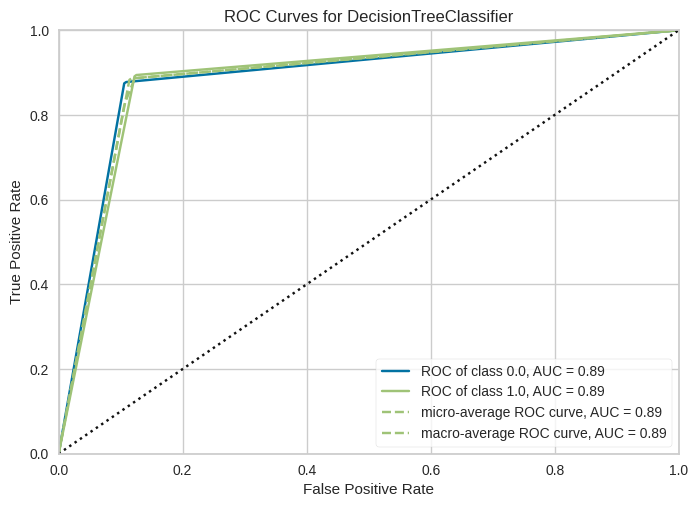

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [64]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smoteTomek, y_train_smoteTomek)

DT_prediction_smoteTomek = model_DT.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, DT_prediction_smoteTomek))
print()

(unique, counts) = np.unique(DT_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, DT_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Decision Tree model after SMOTETomek: ",roc_auc_score(y_test_smoteTomek, DT_prediction_smoteTomek))
print()

roc_auc=ROCAUC(model_DT)
roc_auc.fit(X_train_smoteTomek, y_train_smoteTomek)
roc_auc.score(X_test_smoteTomek, y_test_smoteTomek)
roc_auc.show()

AdaBoost

Accuracy =  0.8536988231293343

Count of predicted labels:  [0. 1.] [40347 41990]

Confusion Metrics after SMOTETomek: 
 [[34785  6484]
 [ 5562 35506]]

Precision Values for: 
  Healthy Patients with no disease = 0.8621458844523756
  Patients With Liver disease = 0.8455822814955942

Recall Values for: 
  Healthy Patients with no disease =  0.8428844895684412
  Healthy Patients With Liver disease =  0.864566085516704

F-Measure Values for: 
  Healthy Patients with no disease =  0.8524063909037444
  Patients with liver disease =  0.8549688169712731

ROC AUC score for AdaBoost model after SMOTETomek:  0.8537252875425726



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


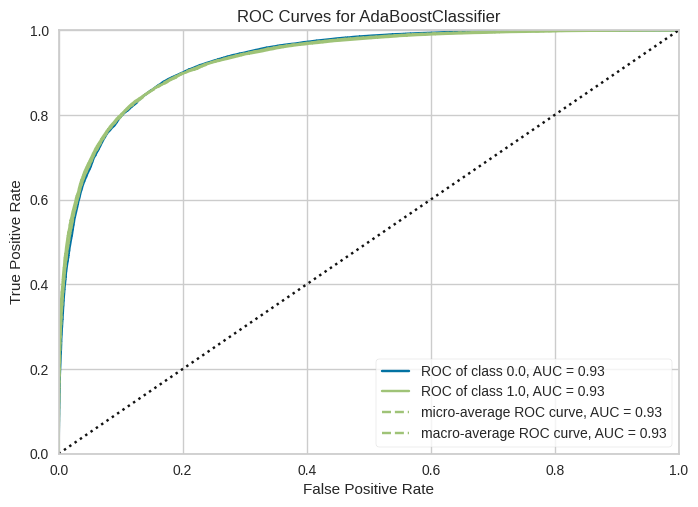

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [65]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smoteTomek, y_train_smoteTomek)

AdaBoost_prediction_smoteTomek = model_AdaBoost.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, AdaBoost_prediction_smoteTomek))
print()

(unique, counts) = np.unique(AdaBoost_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, AdaBoost_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for AdaBoost model after SMOTETomek: ",roc_auc_score(y_test_smoteTomek, AdaBoost_prediction_smoteTomek))
print()

roc_auc=ROCAUC(model_AdaBoost)
roc_auc.fit(X_train_smoteTomek, y_train_smoteTomek)
roc_auc.score(X_test_smoteTomek, y_test_smoteTomek)
roc_auc.show()

XGBOOST

Accuracy =  0.9103076381213792

Count of predicted labels:  [0 1] [43504 38833]

Confusion Metrics after SMOTETomek: 
 [[38694  2575]
 [ 4810 36258]]

Precision Values for: 
  Healthy Patients with no disease = 0.889435454211107
  Patients With Liver disease = 0.9336904179435017

Recall Values for: 
  Healthy Patients with no disease =  0.9376044973224454
  Healthy Patients With Liver disease =  0.88287717931236

F-Measure Values for: 
  Healthy Patients with no disease =  0.9128849987613982
  Patients with liver disease =  0.907573121738151

ROC AUC score for XGBoost model after SMOTETomek:  0.9102408383174027



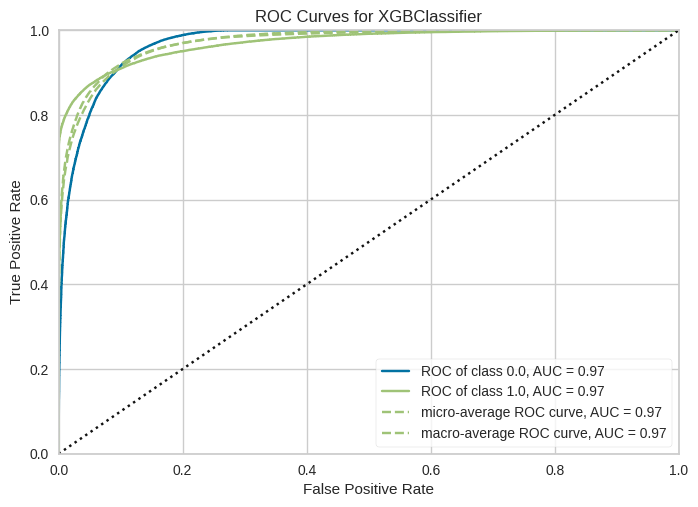

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [66]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smoteTomek, y_train_smoteTomek)

XGB_prediction_smoteTomek = model_XGB.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, XGB_prediction_smoteTomek))
print()

(unique, counts) = np.unique(XGB_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, XGB_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for XGBoost model after SMOTETomek: ",roc_auc_score(y_test_smoteTomek, XGB_prediction_smoteTomek))
print()

roc_auc=ROCAUC(model_XGB)
roc_auc.fit(X_train_smoteTomek, y_train_smoteTomek)
roc_auc.score(X_test_smoteTomek, y_test_smoteTomek)
roc_auc.show()

Light GBM

[LightGBM] [Info] Number of positive: 164773, number of negative: 164572
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 329345, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500305 -> initscore=0.001221
[LightGBM] [Info] Start training from score 0.001221
Accuracy =  0.901065134751084

Count of predicted labels:  [0. 1.] [43249 39088]

Confusion Metrics after SMOTETomek: 
 [[38186  3083]
 [ 5063 36005]]

Precision Values for: 
  Healthy Patients with no disease = 0.8829337094499294
  Patients With Liver disease = 0.9211266884977487

Recall Values for: 
  Healthy Patients with no disease =  0.9252950156291647
  Healthy Patients With Liver disease =  0.8767166650433428

F-Measure Values 

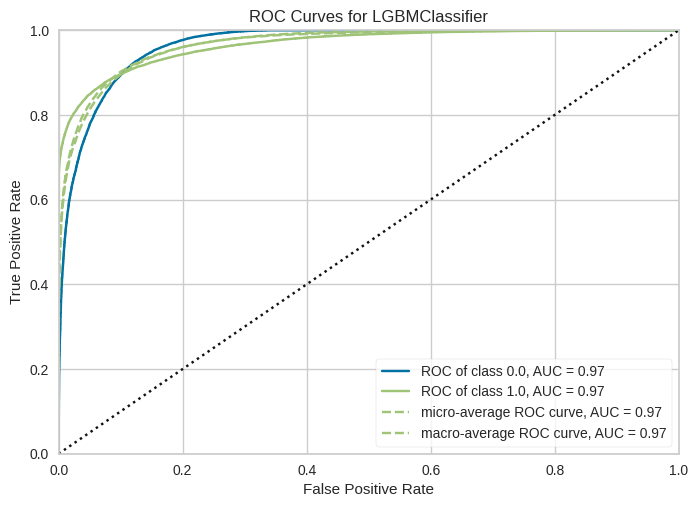

<Axes: title={'center': 'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [67]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smoteTomek, y_train_smoteTomek)

LGBM_prediction_smoteTomek = model_LGBM.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, LGBM_prediction_smoteTomek))
print()

(unique, counts) = np.unique(LGBM_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, LGBM_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for LGBMoost model after SMOTETomek: ",roc_auc_score(y_test_smoteTomek, LGBM_prediction_smoteTomek))
print()

roc_auc=ROCAUC(model_LGBM)
roc_auc.fit(X_train_smoteTomek, y_train_smoteTomek)
roc_auc.score(X_test_smoteTomek, y_test_smoteTomek)
roc_auc.show()

GAUSSIAN MAIVE BAYES

Accuracy =  0.725263247385744

Count of predicted labels:  [0. 1.] [40836 41501]

Confusion Metrics after SMOTETomek: 
 [[29742 11527]
 [11094 29974]]

Precision Values for: 
  Healthy Patients with no disease = 0.7283279459300617
  Patients With Liver disease = 0.7222476566829715

Recall Values for: 
  Healthy Patients with no disease =  0.7206862293731372
  Healthy Patients With Liver disease =  0.7298626667965326

F-Measure Values for: 
  Healthy Patients with no disease =  0.7244869374581329
  Patients with liver disease =  0.7260351948067676

ROC AUC score for Gaussian Naive Bayes model after SMOTETomek:  0.7252744480848349



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


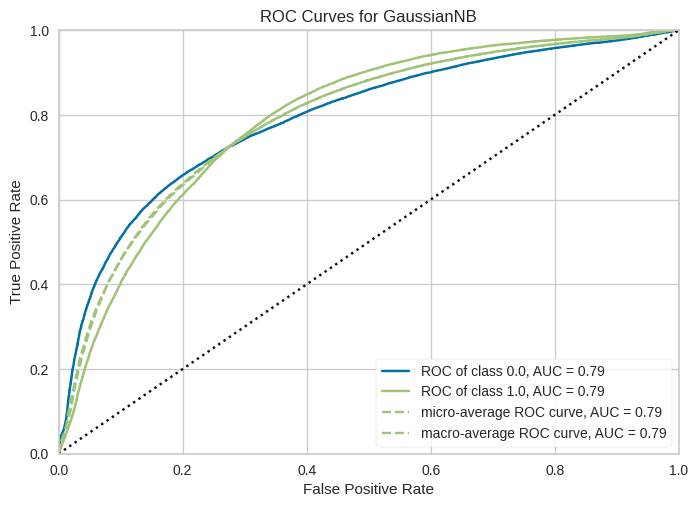

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [68]:
model_NB = GaussianNB()
model_NB.fit(X_train_smoteTomek, y_train_smoteTomek)

NB_prediction_smoteTomek = model_NB.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, NB_prediction_smoteTomek))
print()

(unique, counts) = np.unique(NB_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, NB_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Gaussian Naive Bayes model after SMOTETomek: ",roc_auc_score(y_test_smoteTomek, NB_prediction_smoteTomek))
print()

roc_auc=ROCAUC(model_NB)
roc_auc.fit(X_train_smoteTomek, y_train_smoteTomek)
roc_auc.score(X_test_smoteTomek, y_test_smoteTomek)
roc_auc.show()

<ipython-input-69-1fb22131926a>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-69-1fb22131926a>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-69-1fb22131926a>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-69-1fb22131926a>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-69-1f

[LightGBM] [Info] Number of positive: 164773, number of negative: 164572
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 329345, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500305 -> initscore=0.001221
[LightGBM] [Info] Start training from score 0.001221


<ipython-input-69-1fb22131926a>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-69-1fb22131926a>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,


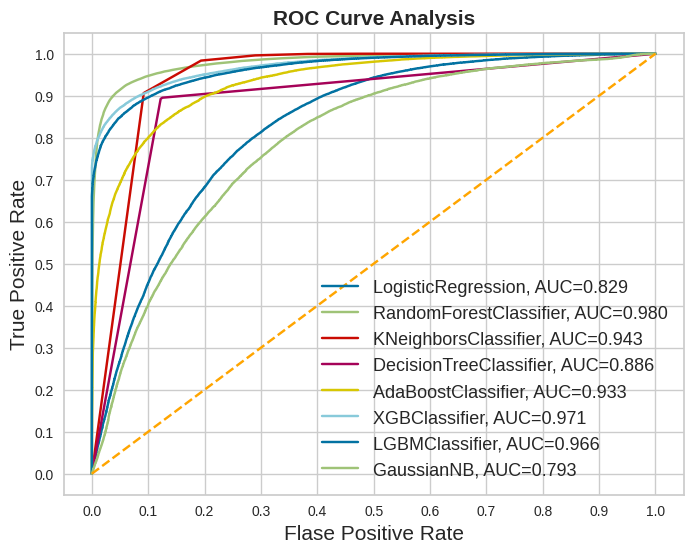

In [69]:
classifiers = [LogisticRegression(max_iter=900),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         DecisionTreeClassifier(),
         AdaBoostClassifier(),
         XGBClassifier(),
         LGBMClassifier(),
         GaussianNB()]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(X_train_smoteTomek, y_train_smoteTomek)
    yproba = model.predict_proba(X_test_smoteTomek)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test_smoteTomek, yproba)
    auc = roc_auc_score(y_test_smoteTomek, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#Technique 3: ADASYN: Adaptive Synthetic

In [70]:
from imblearn.over_sampling import ADASYN

X_adasyn, Y_adasyn = ADASYN().fit_resample(X, Y)
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, Y_adasyn, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique3, counts3) = np.unique(Y_adasyn, return_counts=True)
print("After ADASYN: ", unique3, counts3)

Original data:  [0. 1.] [206064  23717]
After ADASYN:  [0. 1.] [206064 204513]


Logistic Regression

Accuracy: 0.7402942179356032

Count of predicted label: [0. 1.] [38343 43773]

Confusion Metrics: 
 [[29202 12185]
 [ 9141 31588]]

Precision Values for: 
  Healthy Patients with no disease = 0.7615992488850638
  Patients With Liver disease = 0.7216320562904073

Recall Values for: 
  Healthy Patients with no disease =  0.70558387899582
  Healthy Patients With Liver disease =  0.7755653220064328

F-Measure Values for: 
  Healthy Patients with no disease =  0.7325222626363979
  Patients with liver disease =  0.7476272750940807

ROC AUC score for Logistic Regression model after ADASYN:  0.7405746005011264



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


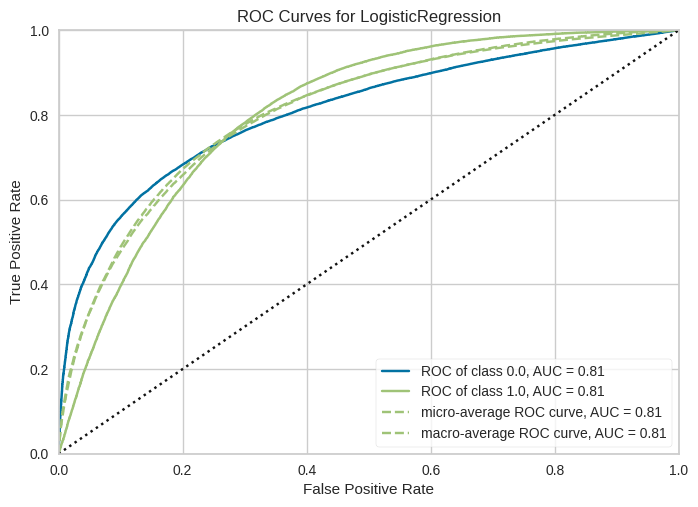

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [71]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_adasyn, y_train_adasyn)
LR_prediction_adasyn = model_LR.predict(X_test_adasyn)

accuracy = metrics.accuracy_score(y_test_adasyn, LR_prediction_adasyn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_adasyn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_adasyn, LR_prediction_adasyn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logistic Regression model after ADASYN: ", roc_auc_score(y_test_adasyn, LR_prediction_adasyn))
print()

roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

Random Forest

Accuracy =  0.9270544108334551

Count of predicted label: [0. 1.] [41795 40321]

Confusion Metrics: 
 [[38596  2791]
 [ 3199 37530]]

Precision Values for: 
  Healthy Patients with no disease = 0.9234597439885154
  Patients With Liver disease = 0.9307804865950745

Recall Values for: 
  Healthy Patients with no disease =  0.9325633653079469
  Healthy Patients With Liver disease =  0.9214564560877998

F-Measure Values for: 
  Healthy Patients with no disease =  0.927989228438845
  Patients with liver disease =  0.9260950030845156

ROC AUC score for Random Forest model after ADASYN:  0.9270099106978734



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


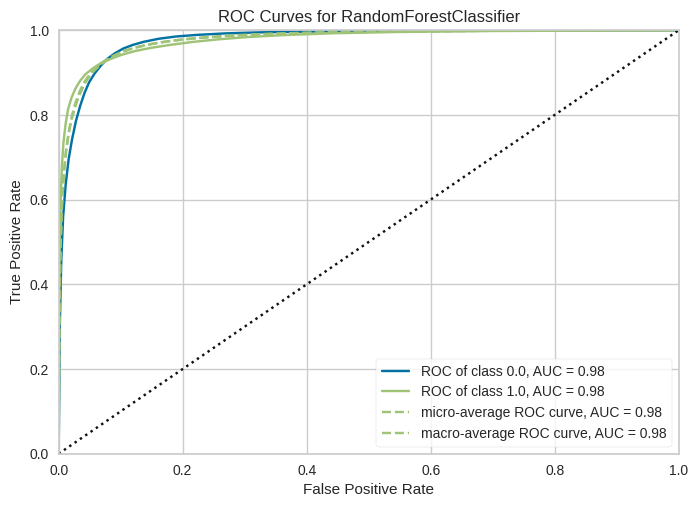

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [72]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_adasyn, y_train_adasyn)

RF_prediction_adasyn = model_RF.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, RF_prediction_adasyn))
print()
(unique, counts) = np.unique(RF_prediction_adasyn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, RF_prediction_adasyn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after ADASYN: ", roc_auc_score(y_test_adasyn, RF_prediction_adasyn))
print()

roc_auc=ROCAUC(model_RF)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

KNN

Accuracy =  0.8449266890739929

Count of predicted labels:  [0. 1.] [28749 53367]

Confusion Metrics after ADASYN: 
 [[28701 12686]
 [   48 40681]]

Precision Values for: 
  Healthy Patients with no disease = 0.9983303767087551
  Patients With Liver disease = 0.7622875559802874

Recall Values for: 
  Healthy Patients with no disease =  0.6934786285548602
  Healthy Patients With Liver disease =  0.9988214785533649

F-Measure Values for: 
  Healthy Patients with no disease =  0.8184384624158776
  Patients with liver disease =  0.8646701241285496

ROC AUC score for KNN model after ADASYN:  0.8461500535541124



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


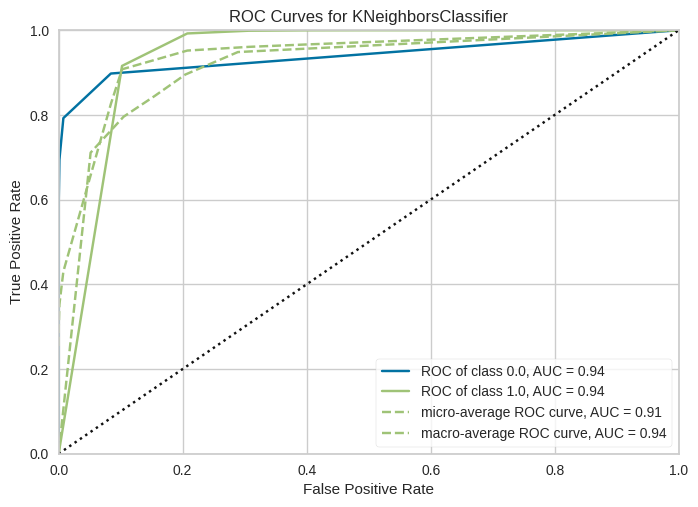

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [73]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_adasyn, y_train_adasyn)

KNN_prediction_adasyn = model_KNN.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, KNN_prediction_adasyn))
print()

(unique, counts) = np.unique(KNN_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, KNN_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for KNN model after ADASYN: ",roc_auc_score(y_test_adasyn, KNN_prediction_adasyn))
print()

roc_auc=ROCAUC(model_KNN)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

DECISION TREE

Accuracy =  0.8823250036533684

Count of predicted labels:  [0. 1.] [40466 41650]

Confusion Metrics after ADASYN: 
 [[36095  5292]
 [ 4371 36358]]

Precision Values for: 
  Healthy Patients with no disease = 0.8919833934661197
  Patients With Liver disease = 0.8729411764705882

Recall Values for: 
  Healthy Patients with no disease =  0.8721337618092638
  Healthy Patients With Liver disease =  0.8926808907657934

F-Measure Values for: 
  Healthy Patients with no disease =  0.8819469048171723
  Patients with liver disease =  0.8827006882822078

ROC AUC score for Decision Tree model after ADASYN:  0.8824073262875286



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


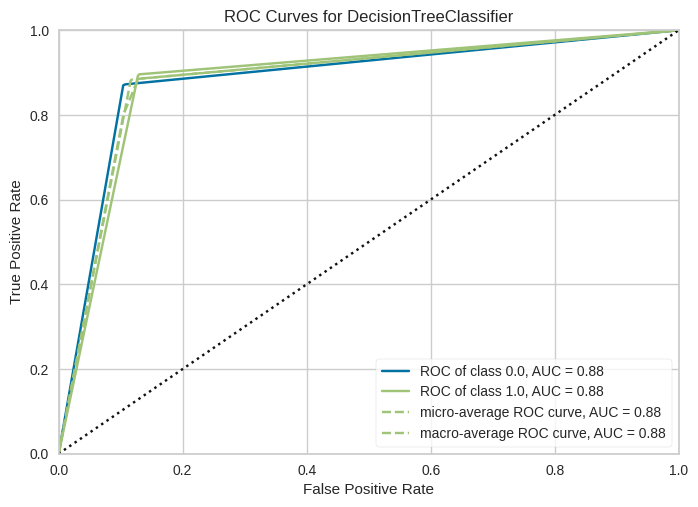

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [74]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_adasyn, y_train_adasyn)

DT_prediction_adasyn = model_DT.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, DT_prediction_adasyn))
print()

(unique, counts) = np.unique(DT_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, DT_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Decision Tree model after ADASYN: ",roc_auc_score(y_test_adasyn, DT_prediction_adasyn))
print()

roc_auc=ROCAUC(model_DT)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

ADABOOST

Accuracy =  0.8461201227531784

Count of predicted labels:  [0. 1.] [40417 41699]

Confusion Metrics after ADABOOST: 
 [[34584  6803]
 [ 5833 34896]]

Precision Values for: 
  Healthy Patients with no disease = 0.8556795407872925
  Patients With Liver disease = 0.8368546008297562

Recall Values for: 
  Healthy Patients with no disease =  0.8356247130741538
  Healthy Patients With Liver disease =  0.8567850917037001

F-Measure Values for: 
  Healthy Patients with no disease =  0.8455332257591316
  Patients with liver disease =  0.8467025767942932

ROC AUC score for AdaBoost model after ADASYN:  0.8462049023889269



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


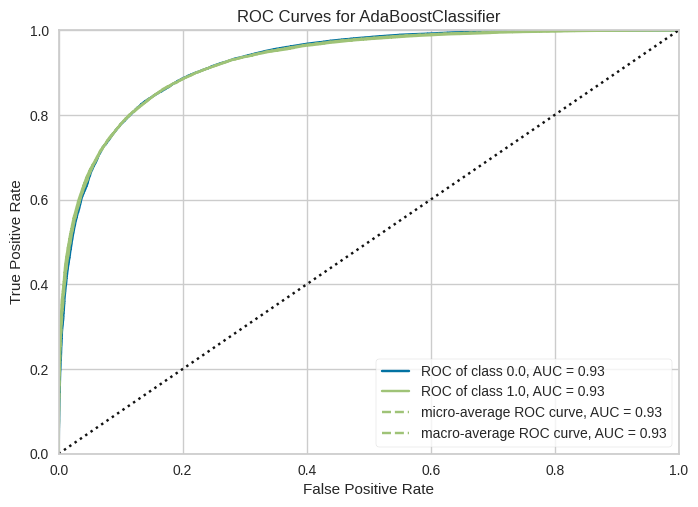

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [75]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_adasyn, y_train_adasyn)

AdaBoost_prediction_adasyn = model_AdaBoost.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, AdaBoost_prediction_adasyn))
print()

(unique, counts) = np.unique(AdaBoost_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, AdaBoost_prediction_adasyn)
print("Confusion Metrics after ADABOOST: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for AdaBoost model after ADASYN: ",roc_auc_score(y_test_adasyn, AdaBoost_prediction_adasyn))
print()

roc_auc=ROCAUC(model_AdaBoost)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

XGBOOST

Accuracy =  0.9095060645915534

Count of predicted labels:  [0 1] [43688 38428]

Confusion Metrics after ADASYN: 
 [[38822  2565]
 [ 4866 35863]]

Precision Values for: 
  Healthy Patients with no disease = 0.888619300494415
  Patients With Liver disease = 0.9332517955657333

Recall Values for: 
  Healthy Patients with no disease =  0.9380240172034697
  Healthy Patients With Liver disease =  0.8805273883473692

F-Measure Values for: 
  Healthy Patients with no disease =  0.9126535409932414
  Patients with liver disease =  0.9061232739997725

ROC AUC score for XGBOOST model after ADASYN:  0.9092757027754195



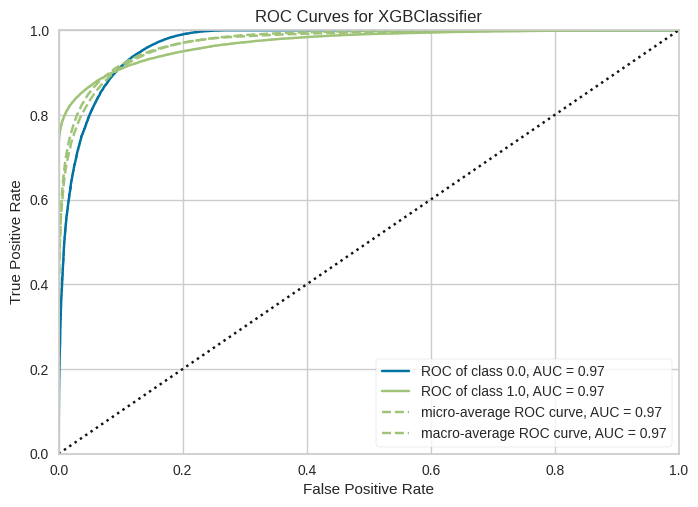

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [76]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_adasyn, y_train_adasyn)

XGB_prediction_adasyn = model_XGB.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, XGB_prediction_adasyn))
print()

(unique, counts) = np.unique(XGB_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, XGB_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for XGBOOST model after ADASYN: ",roc_auc_score(y_test_adasyn, XGB_prediction_adasyn))
print()

roc_auc=ROCAUC(model_XGB)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

Light GBM

[LightGBM] [Info] Number of positive: 163784, number of negative: 164677
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 328461, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498641 -> initscore=-0.005437
[LightGBM] [Info] Start training from score -0.005437
Accuracy =  0.8968532320132495

Count of predicted labels:  [0. 1.] [43267 38849]

Confusion Metrics after ADASYN: 
 [[38092  3295]
 [ 5175 35554]]

Precision Values for: 
  Healthy Patients with no disease = 0.8803938336376453
  Patients With Liver disease = 0.9151844320317125

Recall Values for: 
  Healthy Patients with no disease =  0.9203856283374007
  Healthy Patients With Liver disease =  0.8729406565346559

F-Measure Values f

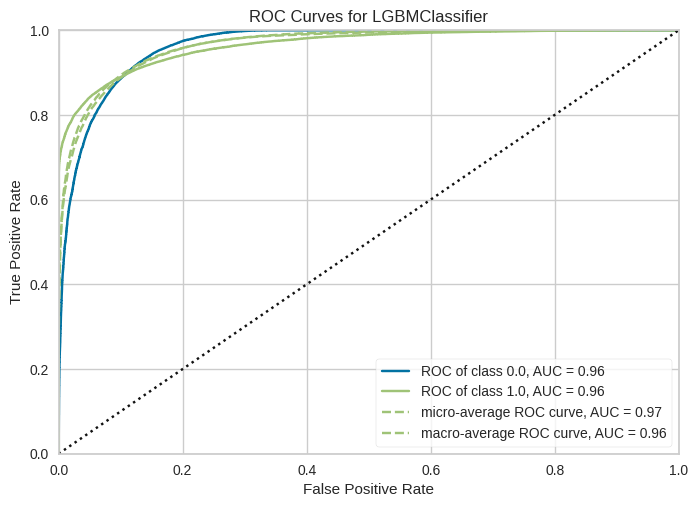

<Axes: title={'center': 'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [77]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_adasyn, y_train_adasyn)

LGBM_prediction_adasyn = model_LGBM.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, LGBM_prediction_adasyn))
print()

(unique, counts) = np.unique(LGBM_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, LGBM_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for LGBMOOST model after ADASYN: ",roc_auc_score(y_test_adasyn, LGBM_prediction_adasyn))
print()

roc_auc=ROCAUC(model_LGBM)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

GAUSSIAN NAIVE BAYES

Accuracy =  0.7145379706756296

Count of predicted labels:  [0. 1.] [40544 41572]

Confusion Metrics after ADASYN: 
 [[29245 12142]
 [11299 29430]]

Precision Values for: 
  Healthy Patients with no disease = 0.7213151144435674
  Patients With Liver disease = 0.7079284133551429

Recall Values for: 
  Healthy Patients with no disease =  0.706622852586561
  Healthy Patients With Liver disease =  0.7225809619681308

F-Measure Values for: 
  Healthy Patients with no disease =  0.713893398103282
  Patients with liver disease =  0.7151796454478074

ROC AUC score for Gaussian Naive Bayes model after ADASYN:  0.7146019072773458



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


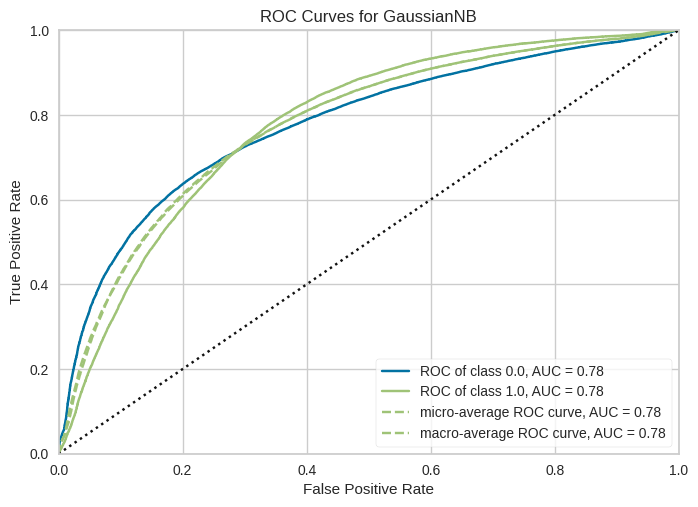

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [78]:
model_NB = GaussianNB()
model_NB.fit(X_train_adasyn, y_train_adasyn)

NB_prediction_adasyn = model_NB.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, NB_prediction_adasyn))
print()

(unique, counts) = np.unique(NB_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, NB_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Gaussian Naive Bayes model after ADASYN: ",roc_auc_score(y_test_adasyn, NB_prediction_adasyn))
print()

roc_auc=ROCAUC(model_NB)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

<ipython-input-79-cae204cd7571>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-79-cae204cd7571>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-79-cae204cd7571>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-79-cae204cd7571>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-79-ca

[LightGBM] [Info] Number of positive: 163784, number of negative: 164677
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 328461, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498641 -> initscore=-0.005437
[LightGBM] [Info] Start training from score -0.005437


<ipython-input-79-cae204cd7571>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-79-cae204cd7571>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,


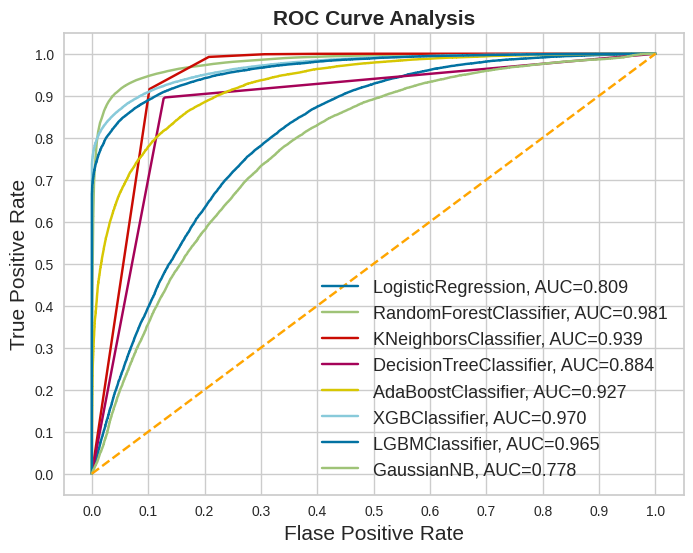

In [79]:
classifiers = [LogisticRegression(max_iter=900),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         DecisionTreeClassifier(),
         AdaBoostClassifier(),
         XGBClassifier(),
         LGBMClassifier(),
         GaussianNB()]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(X_train_adasyn, y_train_adasyn)
    yproba = model.predict_proba(X_test_adasyn)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test_adasyn, yproba)
    auc = roc_auc_score(y_test_adasyn, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#Technique 4: Up-sample minority class

In [80]:
from sklearn.utils import resample
print(df['Label'].value_counts())

0.0    206064
1.0     23717
Name: Label, dtype: int64


In [82]:
df_majority = df[df['Label'] == 1]  #Separate majority and minority classes
df_minority = df[df['Label'] == 0]

# Upsample minority class and other classes separately If not, random samples from combined classes
# will be duplicated and we run into same issue as before, undersampled remians undersampled.
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=406,    # to match average class
                                 random_state=42) # reproducible results

df_upsampled = pd.concat([df_majority, df_minority_upsampled]) # Combine majority class with upsampled minority class
print(df_upsampled['Label'].value_counts())

Y_upsampled = df_upsampled["Label"].values

X_upsampled = df_upsampled.drop(labels = ["Label"], axis=1)
X_upsampled = normalize(X_upsampled, axis=1)

X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, Y_upsampled, test_size=0.2, random_state=20)

1.0    23717
0.0      406
Name: Label, dtype: int64


Logistic Regression

Accuracy: 0.9823834196891191

Count of predicted label: [1.] [4825]

Confusion Metrics: 
 [[   0   85]
 [   0 4740]]

Precision Values for: 
  Healthy Patients with no disease = nan
  Patients With Liver disease = 0.9823834196891191

Recall Values for: 
  Healthy Patients with no disease =  0.0
  Healthy Patients With Liver disease =  1.0

F-Measure Values for: 
  Healthy Patients with no disease =  nan
  Patients with liver disease =  0.9911134343962363

ROC AUC score for Logistic Regression model after upsampling:  0.5



<ipython-input-83-dacfe3f8d574>:21: RuntimeWarning: invalid value encountered in long_scalars
  P0 = cm[0,0] / (cm[0,0]+cm[1,0])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


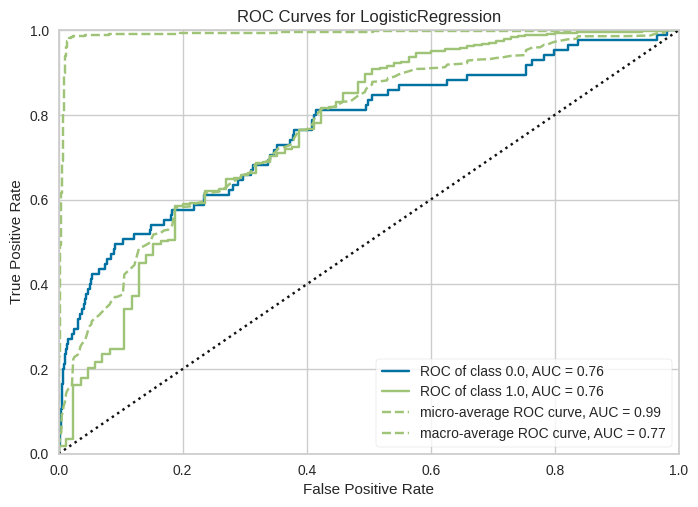

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [83]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_upsampled, y_train_upsampled)
LR_prediction_upsampling = model_LR.predict(X_test_upsampled)

accuracy = metrics.accuracy_score(y_test_upsampled, LR_prediction_upsampling)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_upsampling, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_upsampled, LR_prediction_upsampling)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logistic Regression model after upsampling: ", roc_auc_score(y_test_upsampled, LR_prediction_upsampling))
print()

roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

RANDOM FOREST

Accuracy =  0.9821761658031088

Count of predicted label: [0. 1.] [   3 4822]

Confusion Metrics: 
 [[   1   84]
 [   2 4738]]

Precision Values for: 
  Healthy Patients with no disease = 0.3333333333333333
  Patients With Liver disease = 0.9825798423890502

Recall Values for: 
  Healthy Patients with no disease =  0.011764705882352941
  Healthy Patients With Liver disease =  0.9995780590717299

F-Measure Values for: 
  Healthy Patients with no disease =  0.022727272727272728
  Patients with liver disease =  0.9910060656766366

ROC AUC score for Random Forest model after upsampling:  0.5056713824770415



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


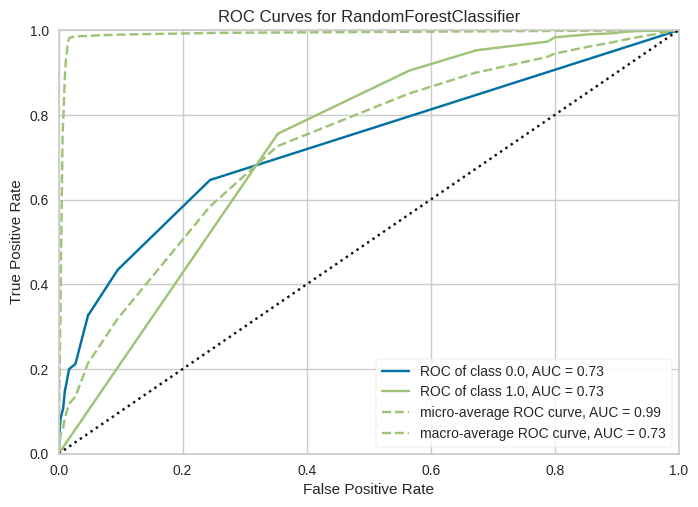

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [84]:
model_RF_upsampled = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF_upsampled.fit(X_train_upsampled, y_train_upsampled)
RF_prediction_upsampled = model_RF_upsampled.predict(X_test_upsampled)

print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, RF_prediction_upsampled))
print()

(unique, counts) = np.unique(RF_prediction_upsampled, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_upsampled, RF_prediction_upsampled)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after upsampling: ", roc_auc_score(y_test_upsampled, RF_prediction_upsampled))
print()

roc_auc=ROCAUC(model_RF_upsampled)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

KNN

Accuracy =  0.9819689119170985

Count of predicted label: [0. 1.] [   2 4823]

Confusion Metrics: 
 [[   0   85]
 [   2 4738]]

Precision Values for: 
  Healthy Patients with no disease = 0.0
  Patients With Liver disease = 0.9823761144515861

Recall Values for: 
  Healthy Patients with no disease =  0.0
  Healthy Patients With Liver disease =  0.9995780590717299

F-Measure Values for: 
  Healthy Patients with no disease =  nan
  Patients with liver disease =  0.9909024364739097

ROC AUC score for KNN model after upsampling:  0.49978902953586496



<ipython-input-85-368a349d6368>:38: RuntimeWarning: invalid value encountered in double_scalars
  print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


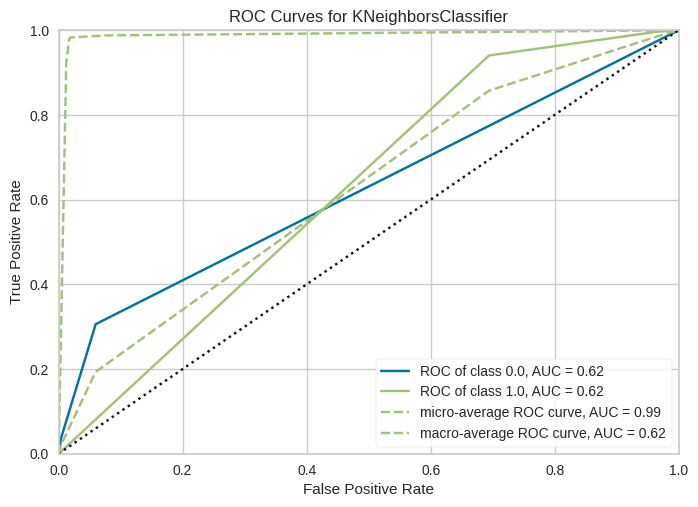

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [85]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_upsampled, y_train_upsampled)
KNN_prediction_upsampled = model_KNN.predict(X_test_upsampled)

print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, KNN_prediction_upsampled))
print()

(unique, counts) = np.unique(KNN_prediction_upsampled, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_upsampled, KNN_prediction_upsampled)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for KNN model after upsampling: ", roc_auc_score(y_test_upsampled, KNN_prediction_upsampled))
print()

roc_auc=ROCAUC(model_KNN)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

DECISION TREE

Accuracy =  0.9635233160621761

Count of predicted label: [0. 1.] [ 105 4720]

Confusion Metrics: 
 [[   7   78]
 [  98 4642]]

Precision Values for: 
  Healthy Patients with no disease = 0.06666666666666667
  Patients With Liver disease = 0.9834745762711864

Recall Values for: 
  Healthy Patients with no disease =  0.08235294117647059
  Healthy Patients With Liver disease =  0.9793248945147679

F-Measure Values for: 
  Healthy Patients with no disease =  0.0736842105263158
  Patients with liver disease =  0.9813953488372094

ROC AUC score for Decision tree  model after upsampling:  0.5308389178456192



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


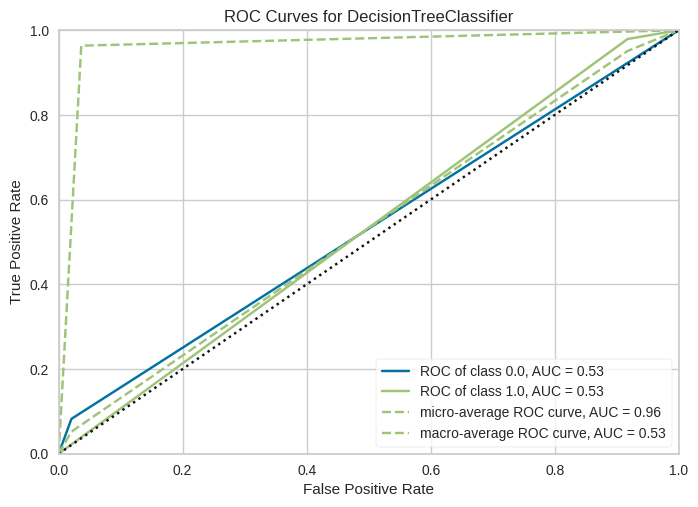

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [86]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_upsampled, y_train_upsampled)
DT_prediction_upsampled = model_DT.predict(X_test_upsampled)

print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, DT_prediction_upsampled))
print()

(unique, counts) = np.unique(DT_prediction_upsampled, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_upsampled, DT_prediction_upsampled)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Decision tree  model after upsampling: ", roc_auc_score(y_test_upsampled, DT_prediction_upsampled))
print()

roc_auc=ROCAUC(model_DT)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

ADABOOST

Accuracy =  0.9813471502590674

Count of predicted label: [0. 1.] [   7 4818]

Confusion Metrics: 
 [[   1   84]
 [   6 4734]]

Precision Values for: 
  Healthy Patients with no disease = 0.14285714285714285
  Patients With Liver disease = 0.9825653798256538

Recall Values for: 
  Healthy Patients with no disease =  0.011764705882352941
  Healthy Patients With Liver disease =  0.9987341772151899

F-Measure Values for: 
  Healthy Patients with no disease =  0.021739130434782608
  Patients with liver disease =  0.9905838041431263

ROC AUC score for Adaboost model after upsampling:  0.5052494415487714



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


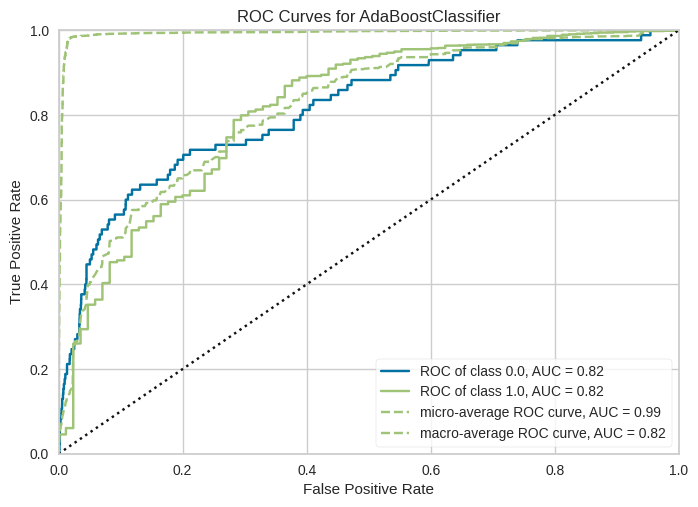

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [87]:
model_Adaboost = AdaBoostClassifier()
model_Adaboost.fit(X_train_upsampled, y_train_upsampled)
Adaboost_prediction_upsampled = model_Adaboost.predict(X_test_upsampled)
print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, Adaboost_prediction_upsampled))
print()

(unique, counts) = np.unique(Adaboost_prediction_upsampled, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_upsampled, Adaboost_prediction_upsampled)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Adaboost model after upsampling: ", roc_auc_score(y_test_upsampled, Adaboost_prediction_upsampled))
print()

roc_auc=ROCAUC(model_Adaboost)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

XGBOOST

Accuracy =  0.9805181347150259

Count of predicted label: [0 1] [  11 4814]

Confusion Metrics: 
 [[   1   84]
 [  10 4730]]

Precision Values for: 
  Healthy Patients with no disease = 0.09090909090909091
  Patients With Liver disease = 0.9825508932280848

Recall Values for: 
  Healthy Patients with no disease =  0.011764705882352941
  Healthy Patients With Liver disease =  0.9978902953586498

F-Measure Values for: 
  Healthy Patients with no disease =  0.020833333333333332
  Patients with liver disease =  0.9901611890307724

ROC AUC score for XGB model after upsampling:  0.5048275006205014



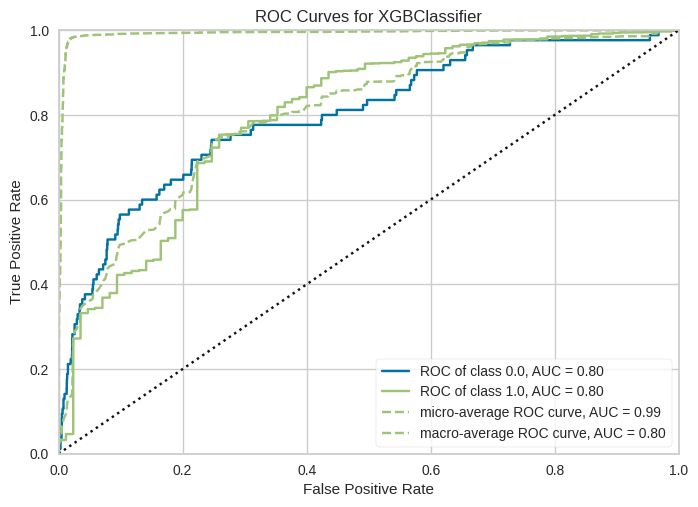

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [88]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_upsampled, y_train_upsampled)
XGB_prediction_upsampled = model_XGB.predict(X_test_upsampled)
print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, XGB_prediction_upsampled))
print()

(unique, counts) = np.unique(XGB_prediction_upsampled, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_upsampled, XGB_prediction_upsampled)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for XGB model after upsampling: ", roc_auc_score(y_test_upsampled, XGB_prediction_upsampled))
print()

roc_auc=ROCAUC(model_XGB)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

LIGHT GBM

[LightGBM] [Info] Number of positive: 18977, number of negative: 321
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5330
[LightGBM] [Info] Number of data points in the train set: 19298, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.983366 -> initscore=4.079542
[LightGBM] [Info] Start training from score 4.079542
Accuracy =  0.9815544041450778

Count of predicted label: [0. 1.] [  12 4813]

Confusion Metrics: 
 [[   4   81]
 [   8 4732]]

Precision Values for: 
  Healthy Patients with no disease = 0.3333333333333333
  Patients With Liver disease = 0.9831705796800333

Recall Values for: 
  Healthy Patients with no disease =  0.047058823529411764
  Healthy Patients With Liver disease =  0.9983122362869198

F-Measure Values for: 
  Healthy Patients wi

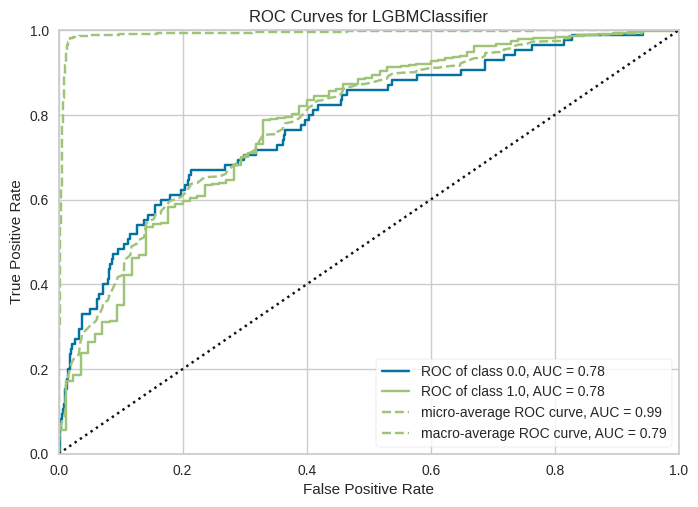

<Axes: title={'center': 'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [89]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_upsampled, y_train_upsampled)
LGBM_prediction_upsampled = model_LGBM.predict(X_test_upsampled)
print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, LGBM_prediction_upsampled))
print()

(unique, counts) = np.unique(LGBM_prediction_upsampled, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_upsampled, LGBM_prediction_upsampled)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for XGB model after upsampling: ", roc_auc_score(y_test_upsampled, LGBM_prediction_upsampled))
print()

roc_auc=ROCAUC(model_LGBM)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

GAUSSIAN NAIVE BAYES

Accuracy =  0.9357512953367876

Count of predicted labels:  [0. 1.] [ 277 4548]

Confusion Metrics after Up Sampling: 
 [[  26   59]
 [ 251 4489]]

Precision Values for: 
  Healthy Patients with no disease = 0.09386281588447654
  Patients With Liver disease = 0.9870272647317502

Recall Values for: 
  Healthy Patients with no disease =  0.3058823529411765
  Healthy Patients With Liver disease =  0.9470464135021097

F-Measure Values for: 
  Healthy Patients with no disease =  0.14364640883977903
  Patients with liver disease =  0.9666236003445307

ROC AUC score for Gaussian Naive Bayes model after Up Sampling:  0.6264643832216431



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


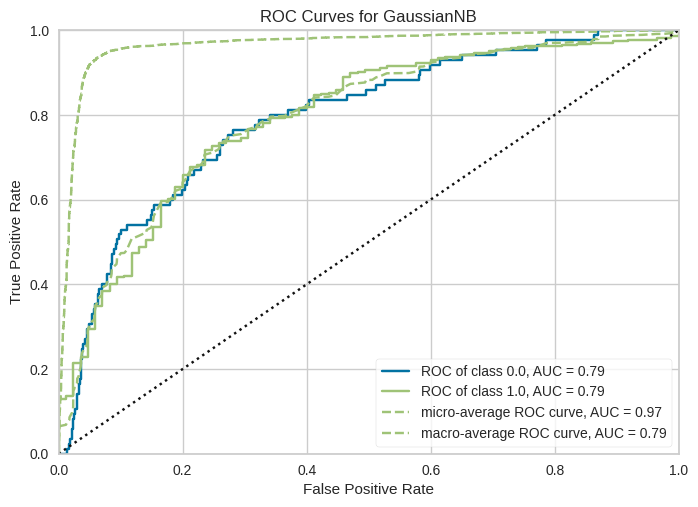

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [90]:
model_NB = GaussianNB()
model_NB.fit(X_train_upsampled, y_train_upsampled)

NB_prediction_upsampled = model_NB.predict(X_test_upsampled)
print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, NB_prediction_upsampled))
print()

(unique, counts) = np.unique(NB_prediction_upsampled, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_upsampled, NB_prediction_upsampled)
print("Confusion Metrics after Up Sampling: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Gaussian Naive Bayes model after Up Sampling: ",roc_auc_score(y_test_upsampled, NB_prediction_upsampled))
print()

roc_auc=ROCAUC(model_NB)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

<ipython-input-91-53ed5301df33>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-91-53ed5301df33>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-91-53ed5301df33>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-91-53ed5301df33>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-91-53

[LightGBM] [Info] Number of positive: 18977, number of negative: 321
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5330
[LightGBM] [Info] Number of data points in the train set: 19298, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.983366 -> initscore=4.079542
[LightGBM] [Info] Start training from score 4.079542


<ipython-input-91-53ed5301df33>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-91-53ed5301df33>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,


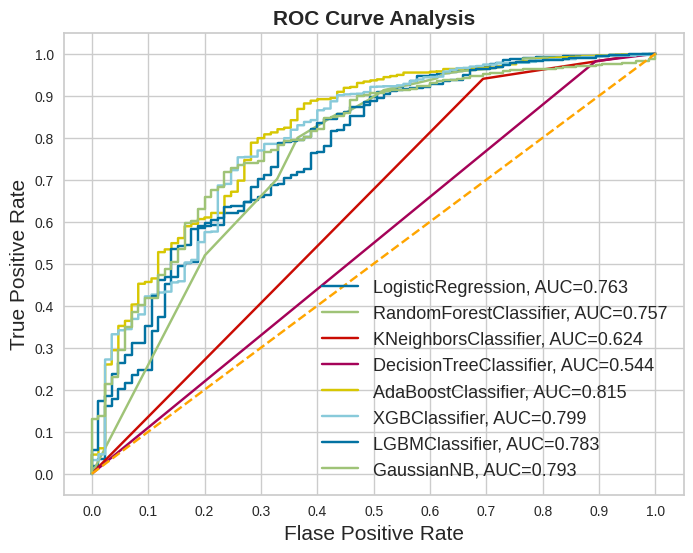

In [91]:
classifiers = [LogisticRegression(max_iter=900),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         DecisionTreeClassifier(),
         AdaBoostClassifier(),
         XGBClassifier(),
         LGBMClassifier(),
         GaussianNB()]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(X_train_upsampled, y_train_upsampled)
    yproba = model.predict_proba(X_test_upsampled)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test_upsampled, yproba)
    auc = roc_auc_score(y_test_upsampled, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

 # k-folds validation

 RANDOM FOREST model (After SMOTEENN)

In [ ]:
from sklearn.model_selection import cross_val_score
#In general, the more folds we use in k-fold cross-validation the lower the bias of the test MSE
#but the higher the variance. Conversely, the fewer folds we use the higher the bias but the lower the variance

scores = cross_val_score(model_RF, X_resampled, y_resampled, scoring='r2', cv=10) # 10 folds
print("Cross_Val_Scores: \n",scores)
print()

print("MEAN:",np.mean(scores))
print()

from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model_RF, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_RF, X_resampled, y_resampled, cv=10)
print("Predicted_Cross_Val_Scores: \n",scores_test)
print()

print("MEAN:",np.mean(scores_test))

KFold on Logestic Regression model

In [ ]:
scores = cross_val_score(model_LR, X_resampled, y_resampled, scoring='r2', cv=10)
#print(scores)
#print(np.mean(scores))

pred = cross_val_predict(model_LR, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_LR, X_resampled, y_resampled, cv=10)
#print(scores_test)

print(np.mean(scores_test))

KFold on KNN model

In [ ]:
scores = cross_val_score(model_KNN, X_resampled, y_resampled, scoring='r2', cv=10) # 10 folds
print("Cross_Val_Scores: \n",scores)
print()

print("MEAN:",np.mean(scores))
print()

from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model_KNN, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_KNN, X_resampled, y_resampled, cv=10)
print("Predicted_Cross_Val_Scores: \n",scores_test)
print()

print("MEAN:",np.mean(scores_test))

KFold on Decision Tree model

In [ ]:
scores = cross_val_score(model_DT, X_resampled, y_resampled, scoring='r2', cv=10) # 10 folds
print("Cross_Val_Scores: \n",scores)
print()

print("MEAN:",np.mean(scores))
print()

pred = cross_val_predict(model_DT, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_DT, X_resampled, y_resampled, cv=10)
print("Predicted_Cross_Val_Scores: \n",scores_test)
print()

print("MEAN:",np.mean(scores_test))

KFold on AdaBoost model

In [ ]:
scores = cross_val_score(model_AdaBoost, X_resampled, y_resampled, scoring='r2', cv=10) # 10 folds
print("Cross_Val_Scores: \n",scores)
print()

print("MEAN:",np.mean(scores))
print()

from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model_AdaBoost, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_AdaBoost, X_resampled, y_resampled, cv=10)
print("Predicted_Cross_Val_Scores: \n",scores_test)
print()

print("MEAN:",np.mean(scores_test))

KFold on XGB model

In [ ]:
scores = cross_val_score(model_XGB, X_resampled, y_resampled, scoring='r2', cv=10) # 10 folds
print("Cross_Val_Scores: \n",scores)
print()

print("MEAN:",np.mean(scores))
print()

pred = cross_val_predict(model_XGB, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_XGB, X_resampled, y_resampled, cv=10)
print("Predicted_Cross_Val_Scores: \n",scores_test)
print()

print("MEAN:",np.mean(scores_test))

KFold on Light GBM model

In [ ]:
scores = cross_val_score(model_LGBM, X_resampled, y_resampled, scoring='r2', cv=10) # 10 folds
print("Cross_Val_Scores: \n",scores)
print()

print("MEAN:",np.mean(scores))
print()

pred = cross_val_predict(model_LGBM, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_LGBM, X_resampled, y_resampled, cv=10)
print("Predicted_Cross_Val_Scores: \n",scores_test)
print()

print("MEAN:",np.mean(scores_test))

In [ ]:
scores = cross_val_score(model_NB, X_resampled, y_resampled, scoring='r2', cv=10) # 10 folds
print("Cross_Val_Scores: \n",scores)
print()

print("MEAN:",np.mean(scores))
print()

pred = cross_val_predict(model_NB, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_NB, X_resampled, y_resampled, cv=10)
print("Predicted_Cross_Val_Scores: \n",scores_test)
print()

print("MEAN:",np.mean(scores_test))

 # k-folds validation on Random Forest model(after Upsampling)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_RF, X_upsampled, Y_upsampled, scoring='r2', cv=10) # 10 folds
print("Cross_Val_Scores: \n",scores)
print()

print("MEAN:",np.mean(scores))
print()

from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model_RF, X_upsampled, Y_upsampled)
#print(pred)

scores_test = cross_val_score(model_RF, X_upsampled, Y_upsampled, cv=10)
print("Predicted_Cross_Val_Scores: \n",scores_test)
print()

print("MEAN:",np.mean(scores_test))